<div style="text-align:center; background-color:blue; padding:10px;">
  <h1 style="color:white;">EDA</h1>
</div>
<br>

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Import des librairies</h1>
</div>
<br>

In [1]:
# Visualisation de données
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sqlalchemy import text
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

# Librairies pour la connection à rds
# from connection import connection_with_sqlalchemy

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Récupération des données sur RDS</h1>
</div>
<br>

In [62]:
#///////////////////////////////////////////////////////////////////////////////
#           A FAIRE UNE SEULE FOIS LORS DU LANCEMENT DU NOTEBOOK
#///////////////////////////////////////////////////////////////////////////////

In [63]:
# Utilisation de sqlalchemy pour charger les données datagouv dans RDS
#Création de la connection

# engine = connection_with_sqlalchemy("datagouv")

# query="""
# SELECT 
#     V.*,
#     T.NAME_TYPE_BIEN,
#     C.NAME_COMMUNE,
#     D.Name_departement,
#     R.Name_region
# FROM VENTES V
# INNER JOIN TYPES_BIENS as T ON V.ID_TYPE_BIEN = T.ID_TYPE_BIEN
# INNER JOIN COMMUNES AS C ON V.ID_COMMUNE = C.ID_COMMUNE
# INNER JOIN DEPARTEMENTS AS D ON C.ID_DEPT = D.ID_DEPT
# INNER JOIN REGIONS R ON D.ID_REGION = R.ID_REGION;
# """
# df = pd.read_sql( sql=text(query), con=engine.connect())
# df.head(10)

In [64]:
# Fermeture de la connection
# engine.dispose()

In [65]:
# Sauvegarde du data frame en csv pour éviter de requêter toute la table plusieurs fois
# df.to_csv('datas_rds.csv', index=False)

<div style="text-align:left; background-color:gray; padding:0px;">
  <h1 style="color:white;">Visualisation des données disponibles RDS</h1>
</div>
<br>

In [2]:
df = pd.read_csv("datas_rds.csv", low_memory=False)
df.head()

ID_VENTE  MONTANT  NUMERO_RUE                 RUE  CODE_POSTAL  LONGITUDE  \
0    319322   450000         493    RTE DES GARAUDES         1400   4.920458   
1    332279   270600         487      CHE DU SORBIER         1400   4.927372   
2    336158   172000         258   RUE DE MUNETVILLE         1400   4.923902   
3    365184   131500          48  RTE DE LA FONTAINE         1400   4.919941   
4    388374   247000           8      IMP DES CHENES         1400   4.921868   

    LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
0  46.133160    2018-07-26           233          6            10800   
1  46.137914    2018-07-30           140          5             9074   
2  46.150990    2018-08-08            88          4              600   
3  46.151171    2018-09-20            81          3                0   
4  46.149648    2018-10-23           159          5              977   

   DEPENDANCES  ID_TYPE_BIEN ID_COMMUNE NAME_TYPE_BIEN  \
0            0             2      01001         Maison   
1            0             2      01001         Maison   
2            0             2      01001         Maison   
3            1             1      01001    Appartement   
4            0             2      01001         Maison   

              NAME_COMMUNE Name_departement           Name_region  
0  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
1  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
2  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
3  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes  
4  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes

In [3]:
print("Nombre de ventes dans le data frame : ", df.shape[0])

Nombre de ventes dans le data frame :  4205071


In [4]:
date_min = str(df.DATE_MUTATION.min()).split()[0]
date_max = str(df.DATE_MUTATION.max()).split()[0]
print(f"Le jeu de données s'étends entre le {date_min} et le {date_max}")

Le jeu de données s'étends entre le 2018-07-01 et le 2022-12-31


In [5]:
# Retrait des colonnes inutiles 
df = df.drop(columns=["ID_VENTE", "ID_TYPE_BIEN"])
# Recherche du nombre de lignes identiques
print(f"Il y a {df.duplicated().sum()} ligne(s) identique(s)")

Il y a 9 ligne(s) identique(s)


In [6]:
# Suppression des lignes identiques
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4205062 entries, 0 to 4205070
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MONTANT           int64  
 1   NUMERO_RUE        int64  
 2   RUE               object 
 3   CODE_POSTAL       int64  
 4   LONGITUDE         float64
 5   LATITUDE          float64
 6   DATE_MUTATION     object 
 7   SURFACE_BATI      int64  
 8   NB_PIECES         int64  
 9   SURFACE_TERRAIN   int64  
 10  DEPENDANCES       int64  
 11  ID_COMMUNE        object 
 12  NAME_TYPE_BIEN    object 
 13  NAME_COMMUNE      object 
 14  Name_departement  object 
 15  Name_region       object 
dtypes: float64(2), int64(7), object(7)
memory usage: 545.4+ MB


In [16]:
df.describe()

MONTANT    NUMERO_RUE   CODE_POSTAL     LONGITUDE      LATITUDE  \
count  4.205062e+06  4.205062e+06  4.205062e+06  4.205062e+06  4.205062e+06   
mean   2.217810e+05  7.944868e+02  5.169592e+04  2.359042e+00  4.617563e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00 -6.180766e+01 -2.138606e+01   
25%    1.050000e+05  8.000000e+00  3.020000e+04  2.517980e-01  4.460209e+01   
50%    1.690000e+05  2.400000e+01  5.115000e+04  2.395133e+00  4.708174e+01   
75%    2.640000e+05  1.000000e+02  7.711400e+04  4.560284e+00  4.878569e+01   
max    2.086000e+09  9.999000e+03  9.749000e+04  5.582923e+01  5.108207e+01   
std    1.482084e+06  2.119499e+03  2.766235e+04  6.541727e+00  6.158376e+00   

                       DATE_MUTATION  SURFACE_BATI     NB_PIECES  \
count                        4205062  4.205062e+06  4.205062e+06   
mean   2020-10-31 09:04:48.839878400  8.506755e+01  3.625912e+00   
min              2018-07-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2019-09-17 00:00:00  5.600000e+01  3.000000e+00   
50%              2020-11-30 00:00:00  8.000000e+01  4.000000e+00   
75%              2021-12-07 00:00:00  1.050000e+02  5.000000e+00   
max              2022-12-31 00:00:00  2.061000e+03  1.090000e+02   
std                              NaN  4.423126e+01  1.553525e+00   

       SURFACE_TERRAIN   DEPENDANCES         année  
count     4.205062e+06  4.205062e+06  4.205062e+06  
mean      2.049642e+03  3.863693e-01  2.020288e+03  
min       0.000000e+00  0.000000e+00  2.018000e+03  
25%       0.000000e+00  0.000000e+00  2.019000e+03  
50%       2.500000e+02  0.000000e+00  2.020000e+03  
75%       9.660000e+02  1.000000e+00  2.021000e+03  
max       2.469125e+07  1.000000e+00  2.022000e+03  
std       2.961560e+04  4.869170e-01  1.307986e+00

In [8]:
df['DATE_MUTATION'] = pd.to_datetime(df['DATE_MUTATION'])

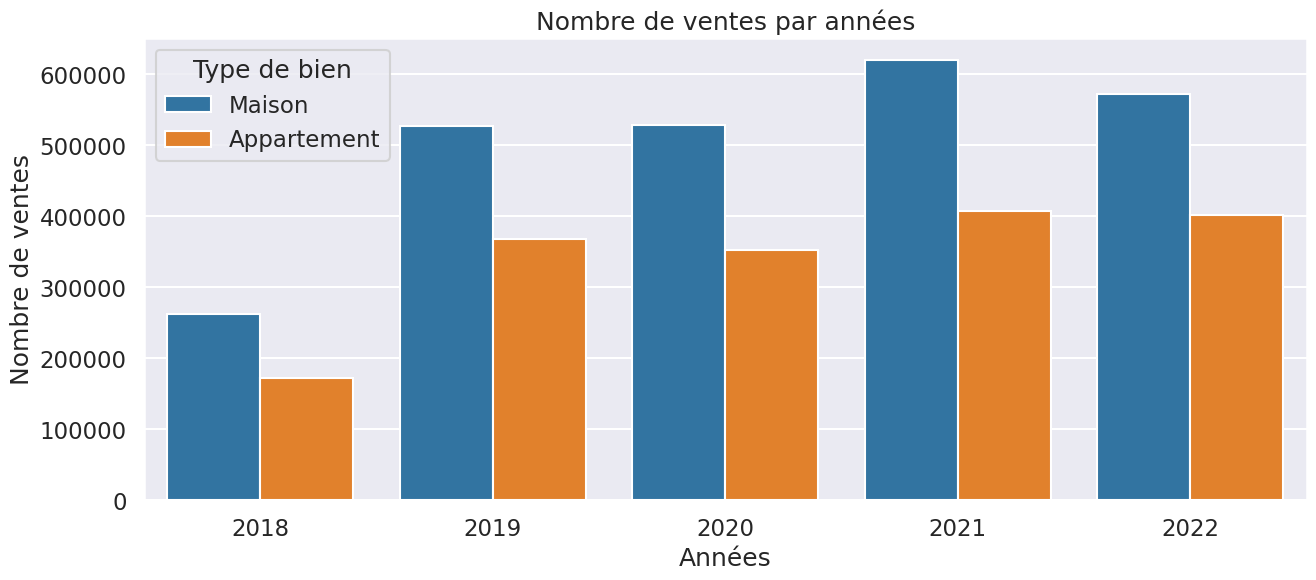

In [15]:
df["année"] =  df['DATE_MUTATION'].dt.year

plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="année",hue="NAME_TYPE_BIEN")
plt.title("Nombre de ventes par années")
plt.xlabel('Années')
plt.ylabel('Nombre de ventes') 
plt.legend(title="Type de bien", loc='upper left')
plt.show()

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Répartition des variables catégorielle</h1>
</div>
<br>

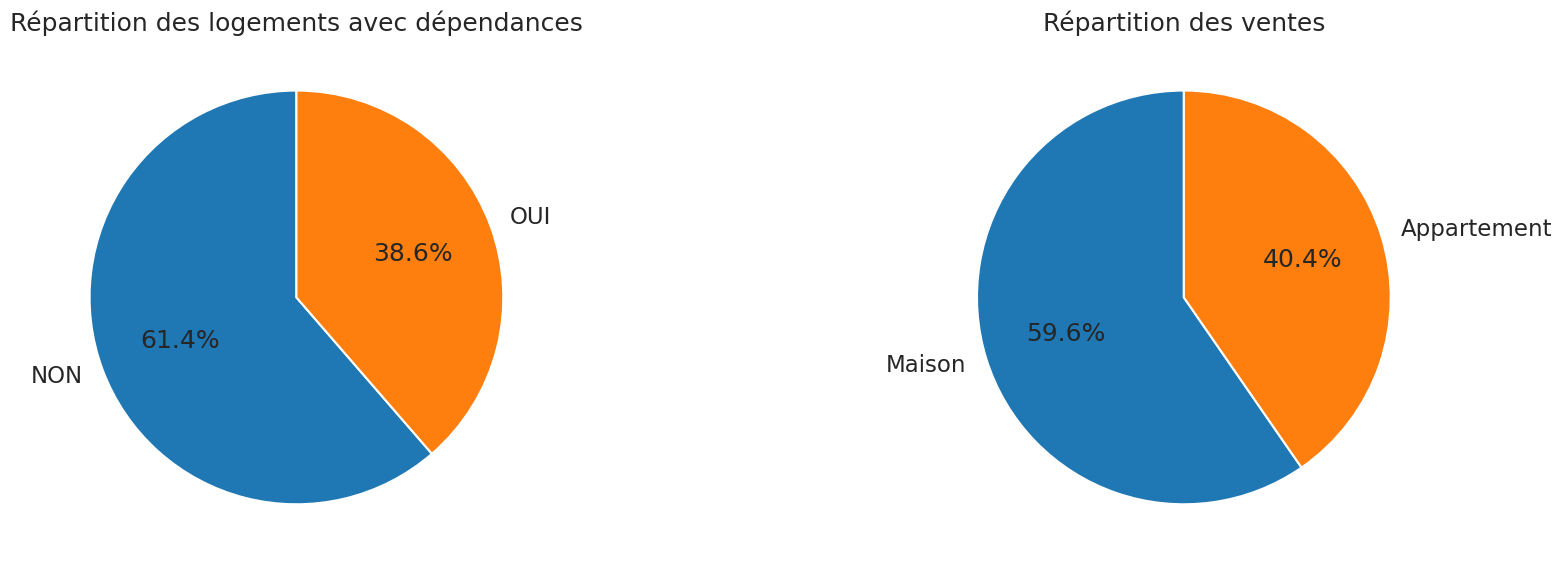

In [73]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Répartition entre dépendance ou non
count_data = df['DEPENDANCES'].value_counts()
ax1.pie(count_data, data=df,
         labels=['NON', 'OUI'], autopct='%1.1f%%', startangle=90)
ax1.set_title('Répartition des logements avec dépendances')

# Répartition entre Appartement et maison
count_data = df['NAME_TYPE_BIEN'].value_counts()
ax2.pie(count_data, labels=count_data.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Répartition des ventes')

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix au niveau national</h1>
</div>
<br>

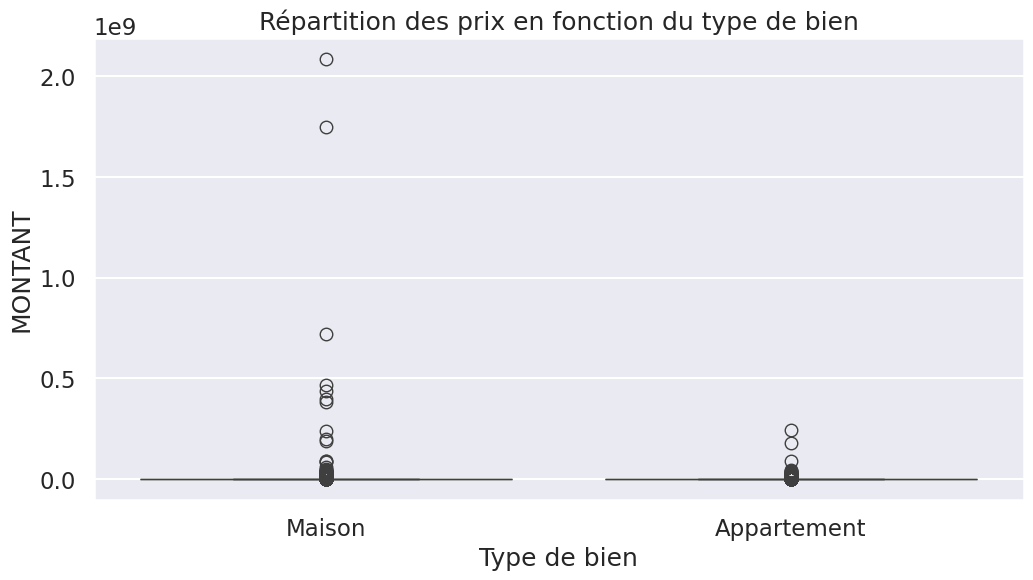

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_TYPE_BIEN', y='MONTANT', data=df)
plt.title('Répartition des prix en fonction du type de bien')
plt.xlabel("Type de bien")
plt.show()

### Conclusion : Les valeurs extreme dans le jeu de données ne permettent pas de visualiser correctement les prix avec une échelle linéaire => Visualisation avec une échelle logarithmique :

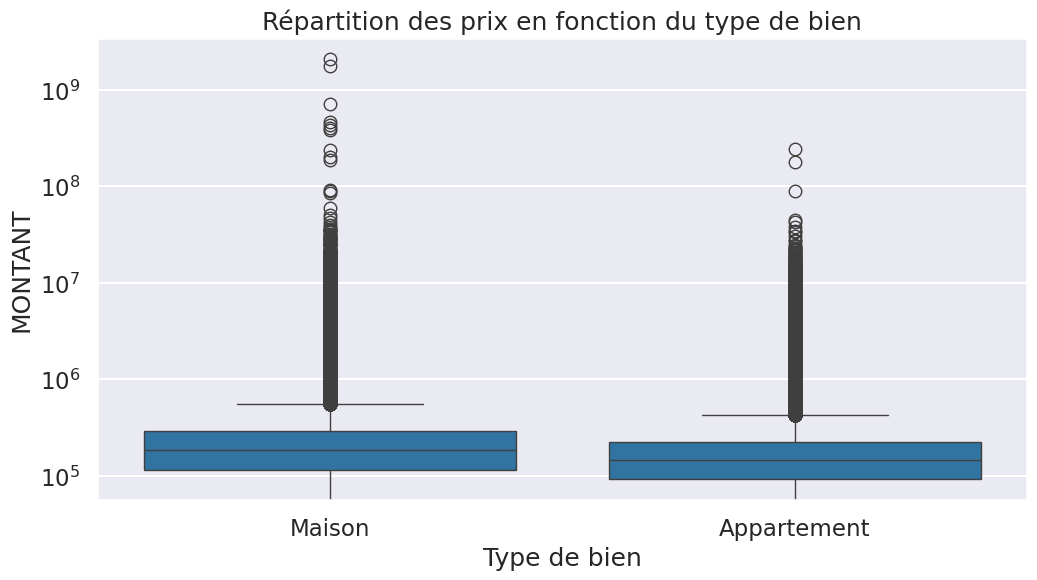

In [75]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_TYPE_BIEN', y='MONTANT', data=df)
plt.yscale("log")
plt.title('Répartition des prix en fonction du type de bien')
plt.xlabel("Type de bien")
plt.show()

### Conclusion : Les prix évoluent sur une très large fourchette. Cela peut s'expliquer par le fait que le prix au m2 n'est pas le même d'une région à une autre ou d'une ville à l'autre

In [18]:
for i in df.NAME_TYPE_BIEN.unique():
    print(f"Répartition pour {i} :")
    visu_quantiles =  df.loc[df.NAME_TYPE_BIEN==i,"MONTANT"].quantile([0, 0.25, 0.5, 0.75, 1]).astype(int).to_list()
    print(visu_quantiles)

Répartition pour Maison :
[0, 116000, 186000, 290000, 2086000000]
Répartition pour Appartement :
[0, 92600, 146500, 224750, 245365904]


Ces données nous donnent les informations suivantes : 
- Des biens ont été vendus à 0€ (après recherche 3 maisons et 7 appartements)
- Le prix médian est de : 
    186 000€ pour une maison 
    146 500€ pour un appartement.
- Le prix le plus élevé est de : 
    Plus de 2 milliards pour une maison
    Plus de 200 millions pour un appartement


In [20]:
for i in df.NAME_TYPE_BIEN.unique():
    print(f"Nombre de vente de {i} à 0€ :",df.loc[(df.NAME_TYPE_BIEN==i) & (df.MONTANT==0),"MONTANT"].shape[0])

Nombre de vente de Maison à 0€ : 3
Nombre de vente de Appartement à 0€ : 7


In [77]:
df.loc[df.MONTANT==visu_quantiles[-1],:]

MONTANT  NUMERO_RUE             RUE  CODE_POSTAL  LONGITUDE  \
990229  2086000000          33  CORNIC AN HENT        29440  -4.111461   

         LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
990229  48.599533    2019-04-19           132          5             1539   

        DEPENDANCES ID_COMMUNE NAME_TYPE_BIEN NAME_COMMUNE Name_departement  \
990229            0      29213         Maison   Plouzévédé        Finistère   

       Name_region  
990229    Bretagne

### Il s'agit sûrement d'une erreur dans la saisie des données car 2 milliards pour une maison de 132m2 parait cher !!

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix dans le temps</h1>
</div>

=> Pour voir l'évolution des prix dans le temps il faut passer par les étapes suivantes :
- Créer une colonne pour indiquer le trimestre et l'année. Exemple : 1er trimestre 2020
- Créer un jeu de données avec le montant le type de bien et la période (groupby)
- Afficher ce jeu de données à l'aide de seaborn

In [78]:
# Ajout d'une colonne trimestre pour voir l'evolution
df['Trimestre'] = df['DATE_MUTATION'].dt.to_period('Q')
display(df.head(2))
display(df.tail(2))

MONTANT  NUMERO_RUE               RUE  CODE_POSTAL  LONGITUDE   LATITUDE  \
0   450000         493  RTE DES GARAUDES         1400   4.920458  46.133160   
1   270600         487    CHE DU SORBIER         1400   4.927372  46.137914   

  DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  DEPENDANCES  \
0    2018-07-26           233          6            10800            0   
1    2018-07-30           140          5             9074            0   

  ID_COMMUNE NAME_TYPE_BIEN             NAME_COMMUNE Name_departement  \
0      01001         Maison  L'Abergement-Clémenciat              Ain   
1      01001         Maison  L'Abergement-Clémenciat              Ain   

            Name_region Trimestre  
0  Auvergne-Rhône-Alpes    2018Q3  
1  Auvergne-Rhône-Alpes    2018Q3

MONTANT  NUMERO_RUE                     RUE  CODE_POSTAL  LONGITUDE  \
4205069    55000          19         PAS DU TOURNEUR        97413  55.467416   
4205070   335000           1  RTE DU BRAS DES ETANGS        97413  55.469297   

          LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
4205069 -21.136974    2022-11-30            56          4              270   
4205070 -21.134559    2022-12-16            97          5              343   

         DEPENDANCES ID_COMMUNE NAME_TYPE_BIEN NAME_COMMUNE Name_departement  \
4205069            0      97424         Maison       Cilaos       La Réunion   
4205070            0      97424         Maison       Cilaos       La Réunion   

        Name_region Trimestre  
4205069  La Réunion    2022Q4  
4205070  La Réunion    2022Q4

### Le jeu de données évolue entre le troisième trimestre 2018 et le deuxième trimestre 2022

In [79]:
# Selection des données
df_temp = df.loc[:,['Trimestre','NAME_TYPE_BIEN','MONTANT']]
# Groupement sur la période et le type de bien
df_temp=df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).mean().reset_index()
# Tri du data frame par ordre croissant
df_temp = df_temp.sort_values(by='Trimestre')

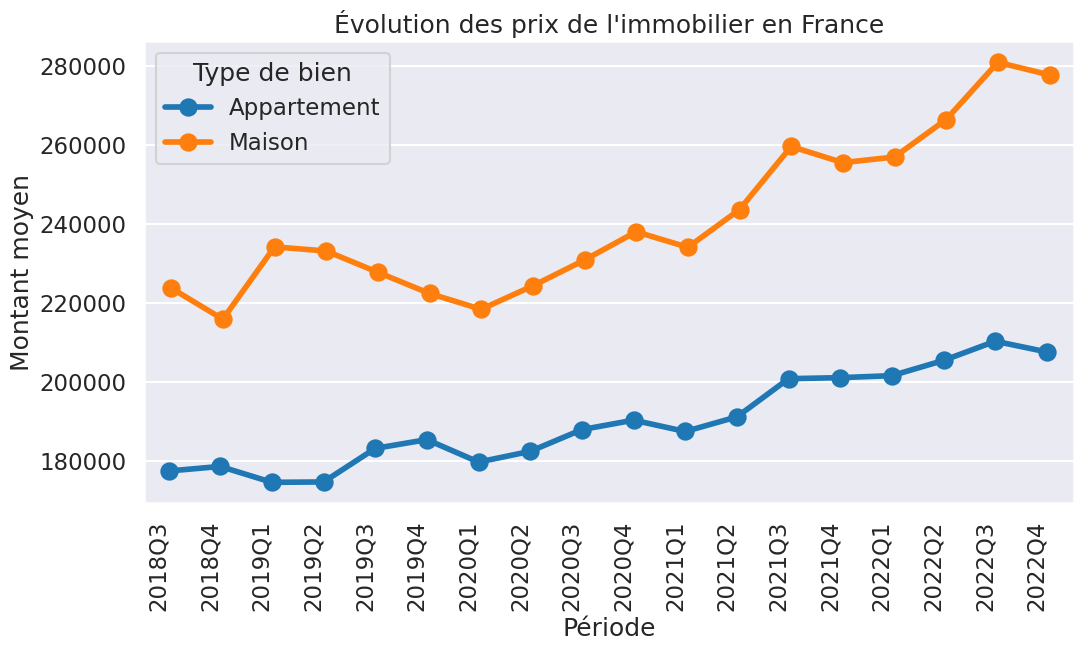

In [80]:
# Affichage avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN', 
                   dodge=True, markers='o', linestyles='-')
plt.title("Évolution des prix de l'immobilier en France")
plt.xlabel("Période")
plt.ylabel("Montant moyen")
plt.legend(title='Type de bien')
plt.xticks(rotation=90, ha="right")
plt.show()

### Conclusion : le prix augmente en fonction du temps mais pas de manière complètement linéaire ni cyclique

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix au niveau régionale</h1>
</div>
<br>

In [81]:
print(f"Il y a {df.Name_region.nunique()} region en France :")
liste_regions=df.Name_region.unique()
print(liste_regions)

Il y a 17 region en France :
['Auvergne-Rhône-Alpes' 'Hauts-de-France' "Provence-Alpes-Côte d'Azur"
 'Grand Est' 'Occitanie' 'Normandie' 'Nouvelle-Aquitaine'
 'Centre-Val de Loire' 'Bourgogne-Franche-Comté' 'Bretagne' 'Corse'
 'Pays de la Loire' 'Île-de-France' 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion']


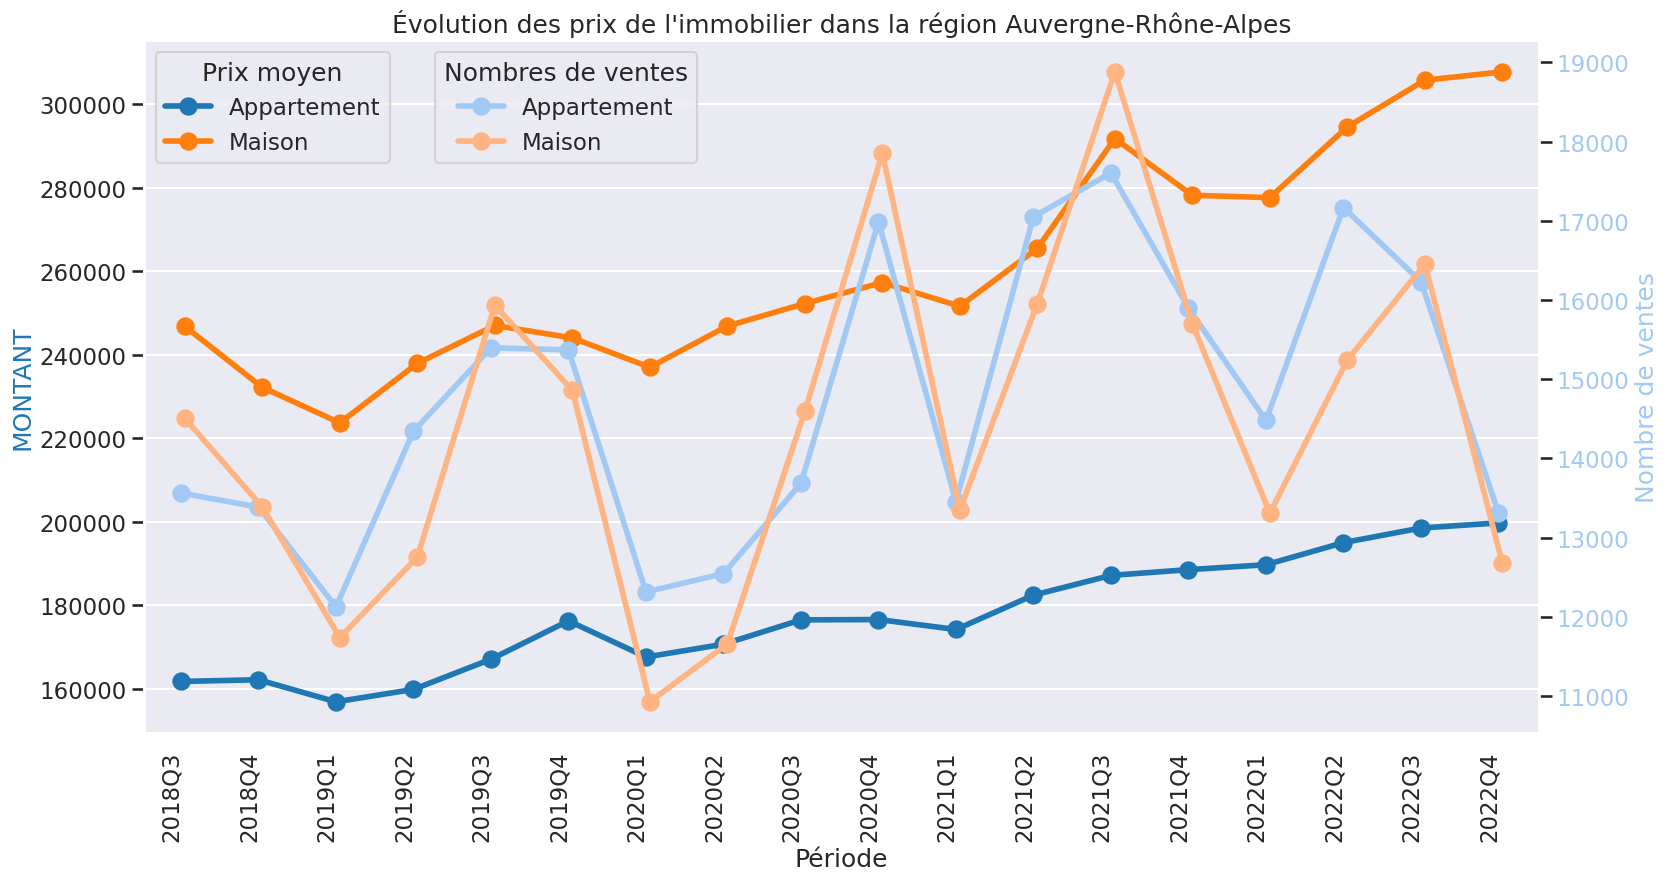

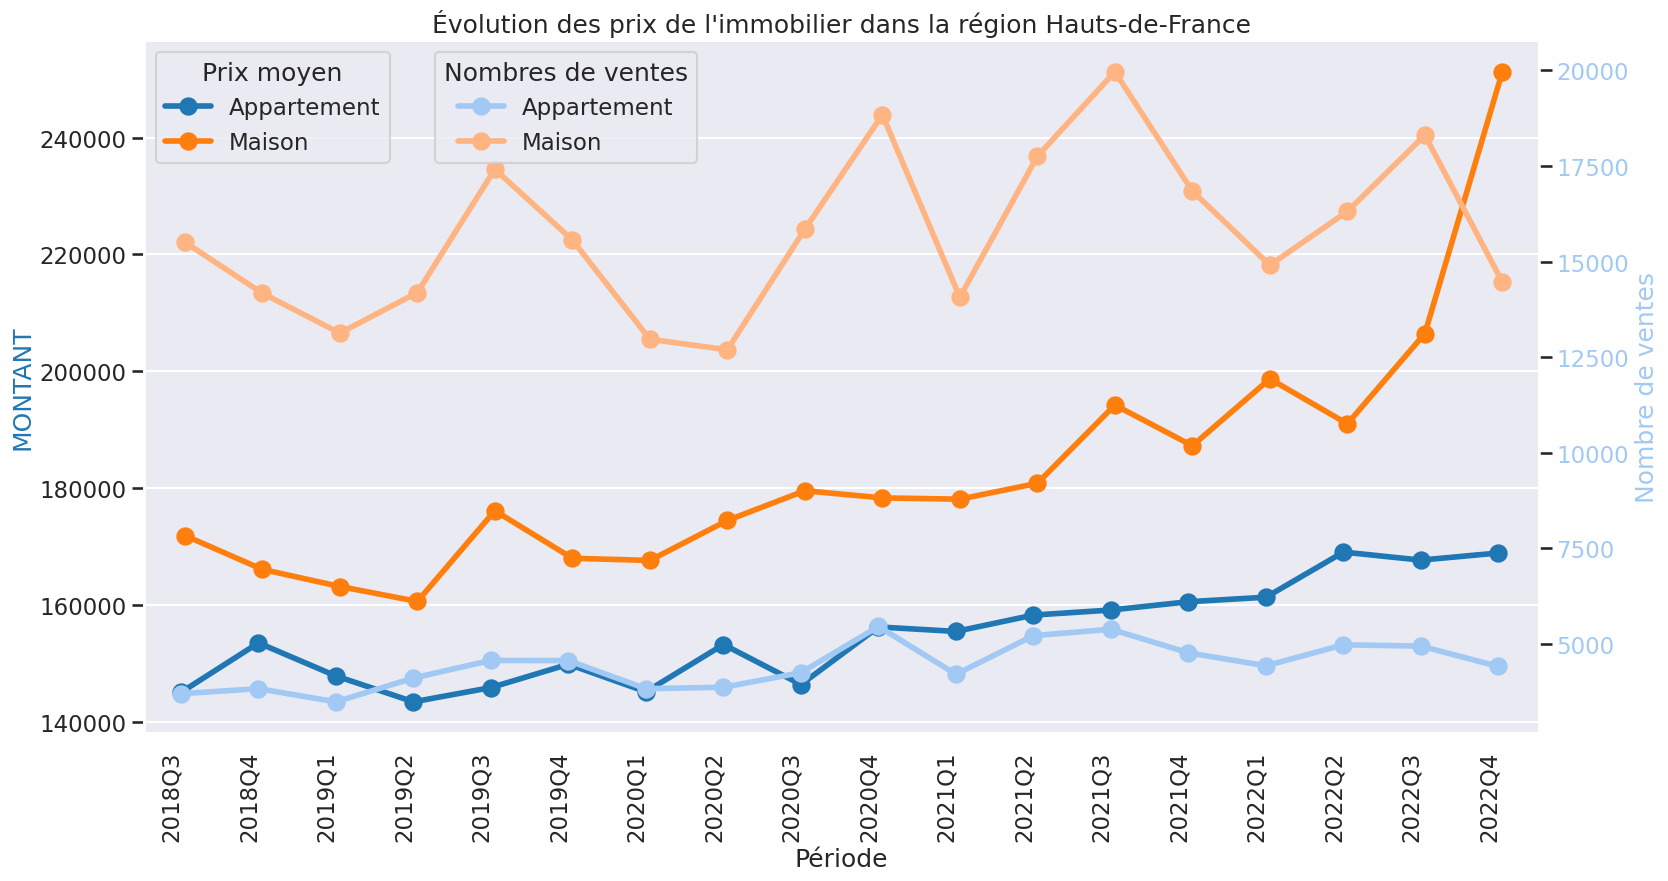

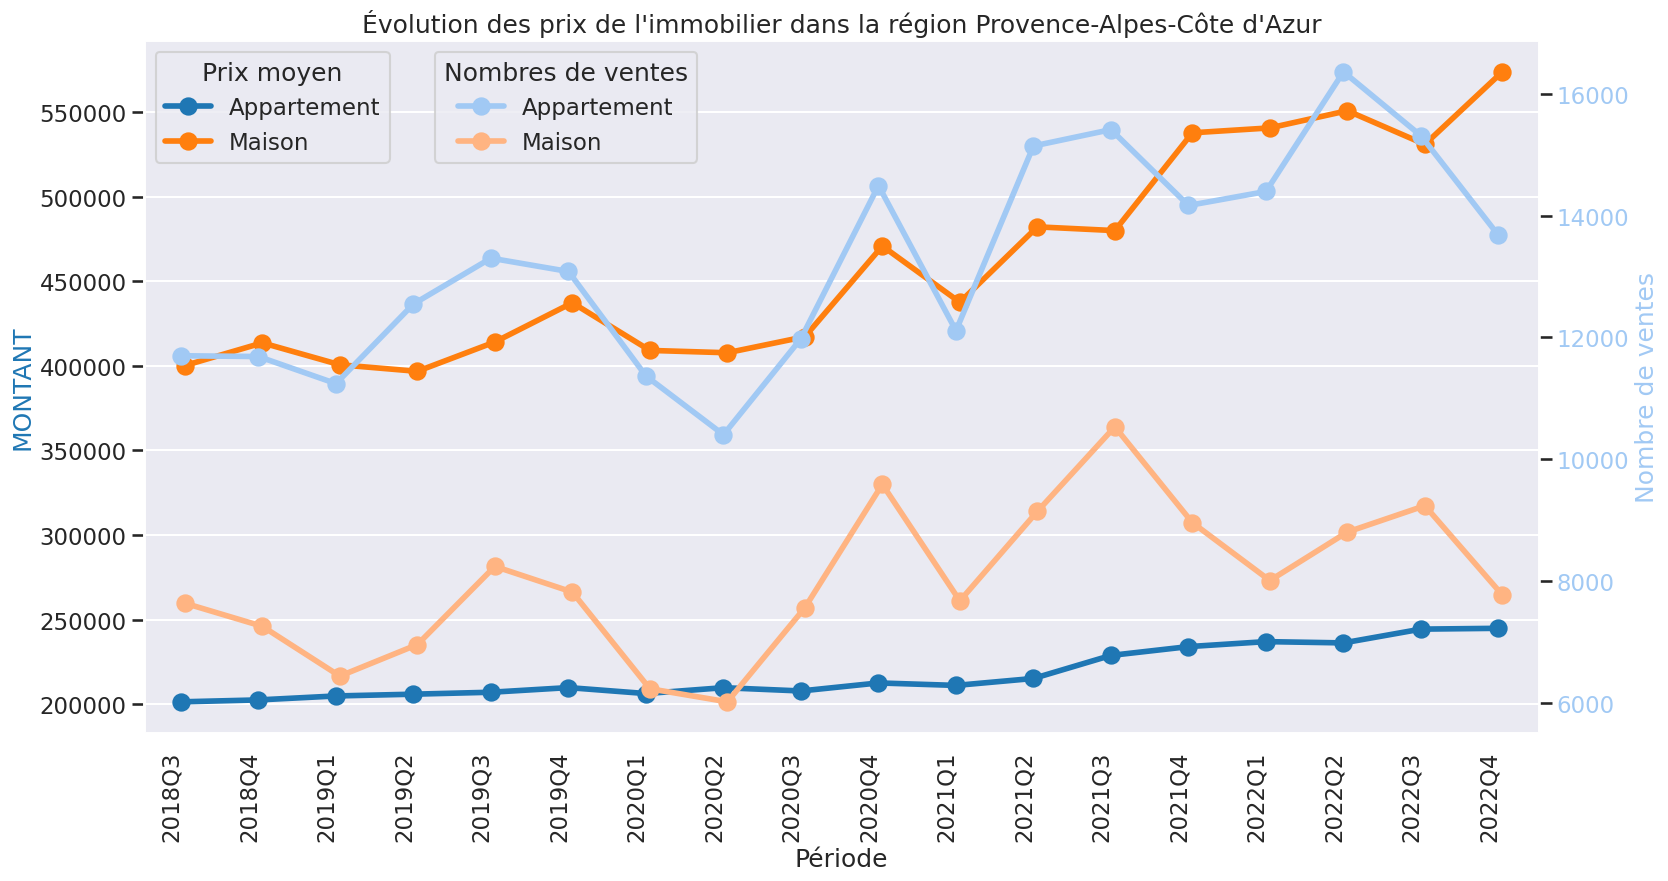

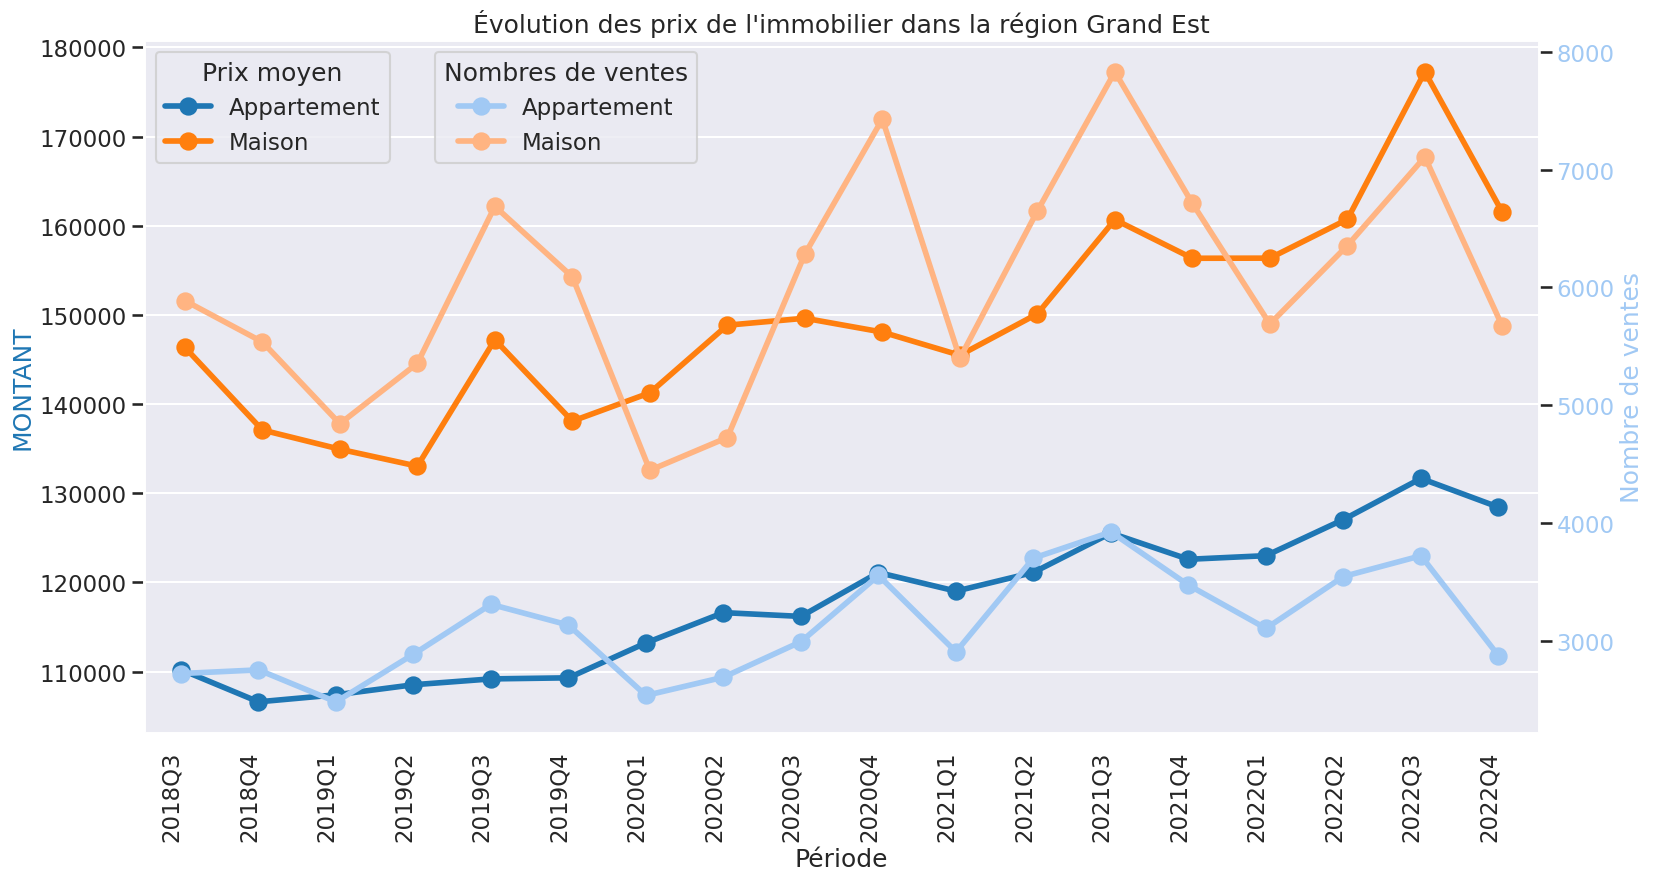

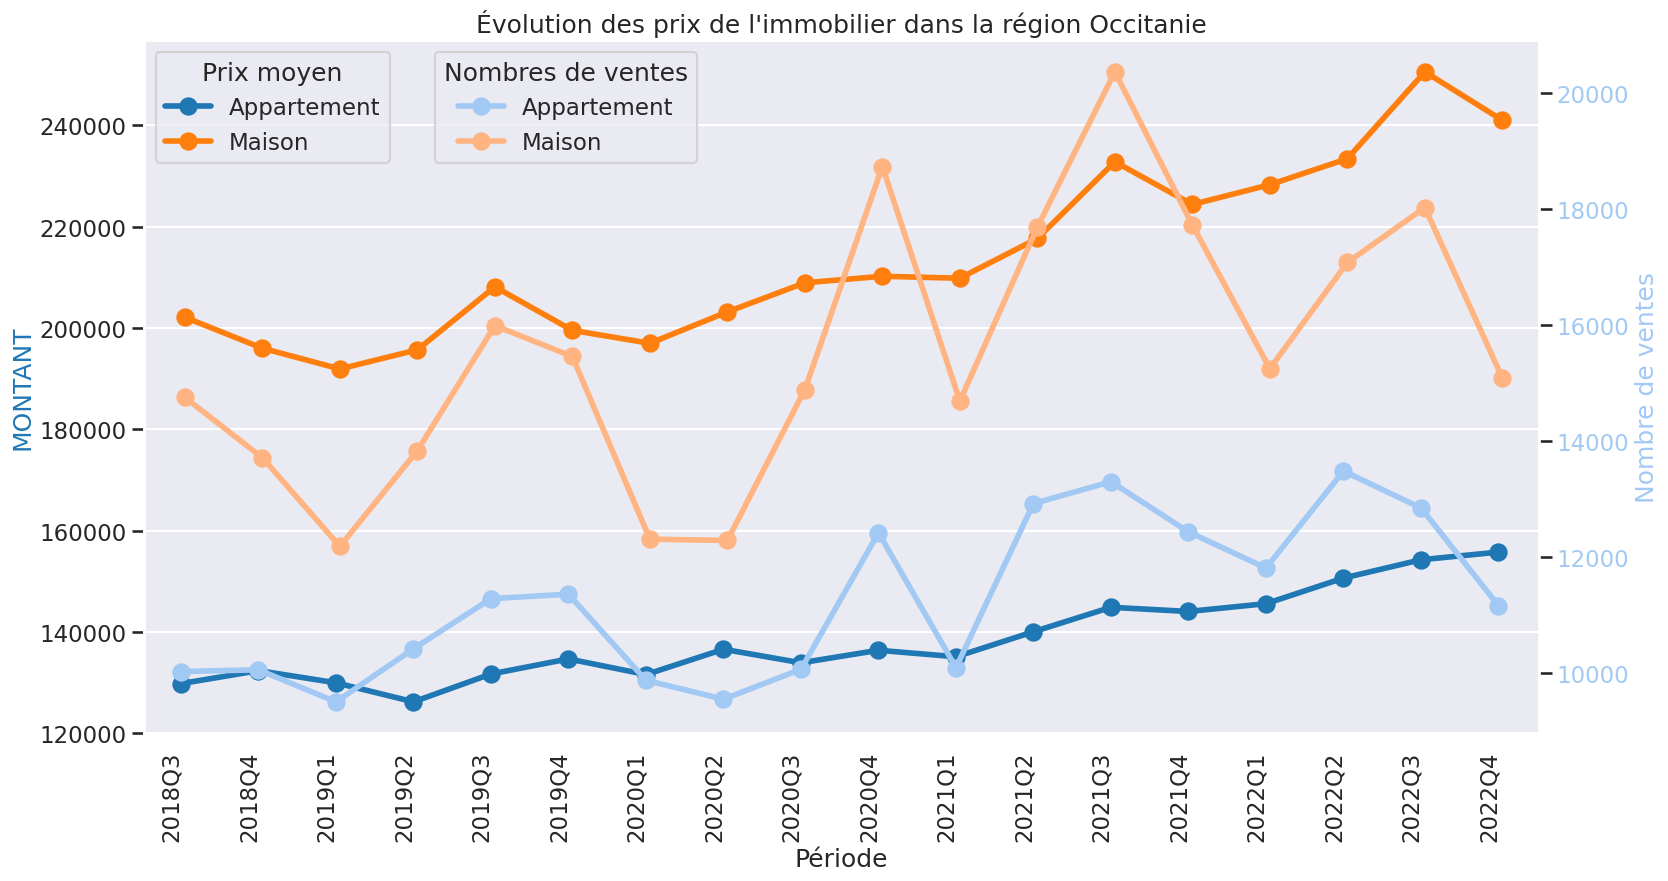

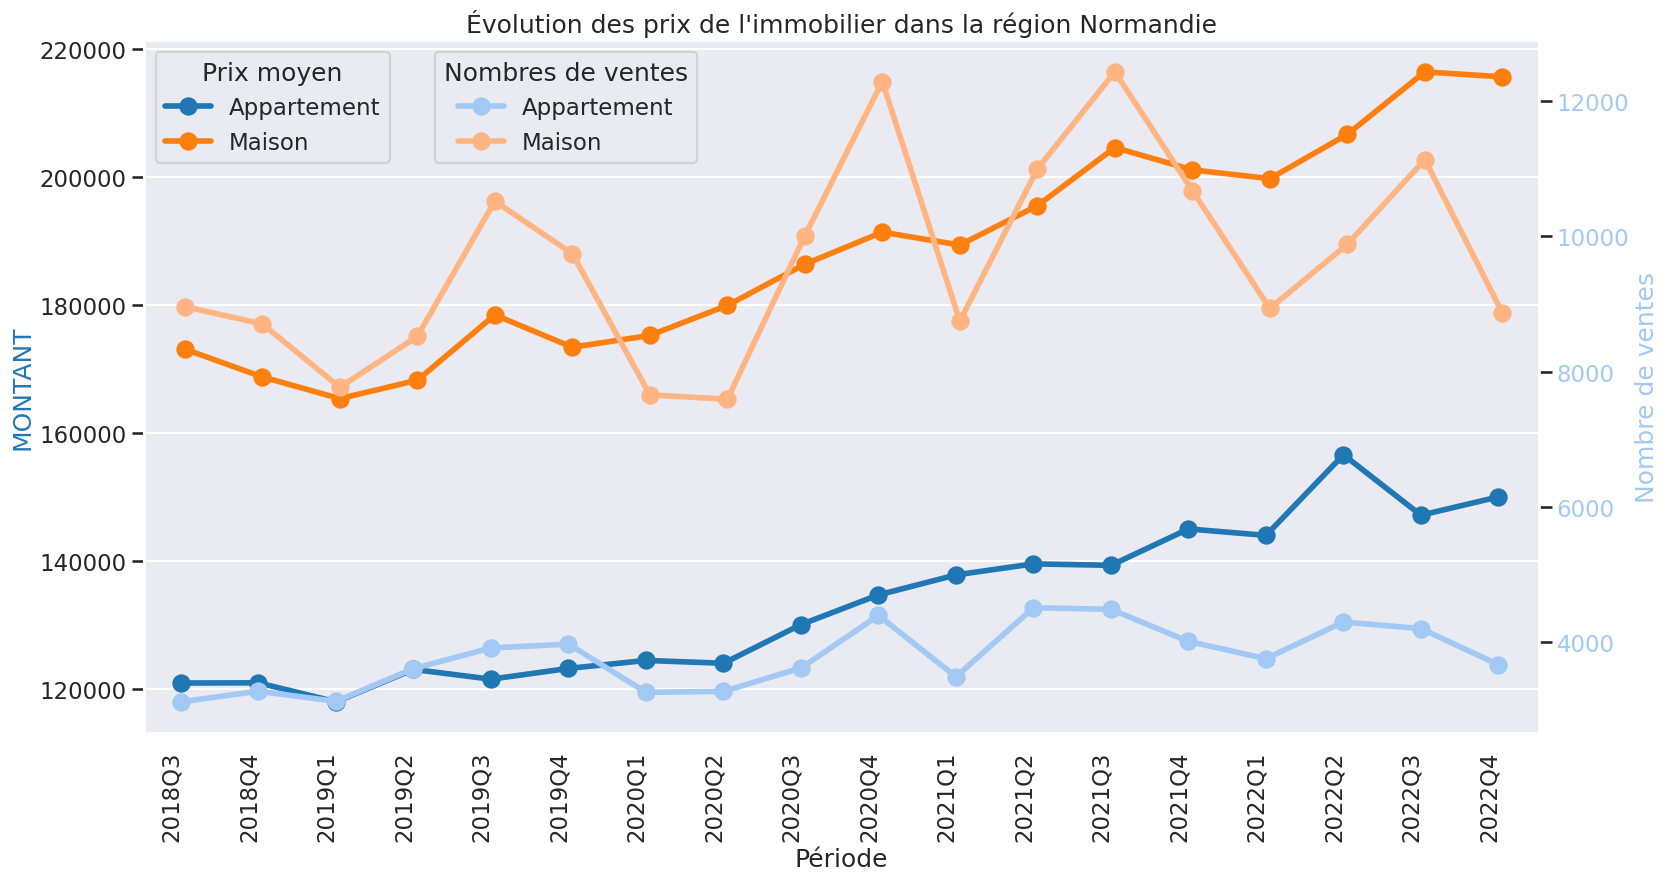

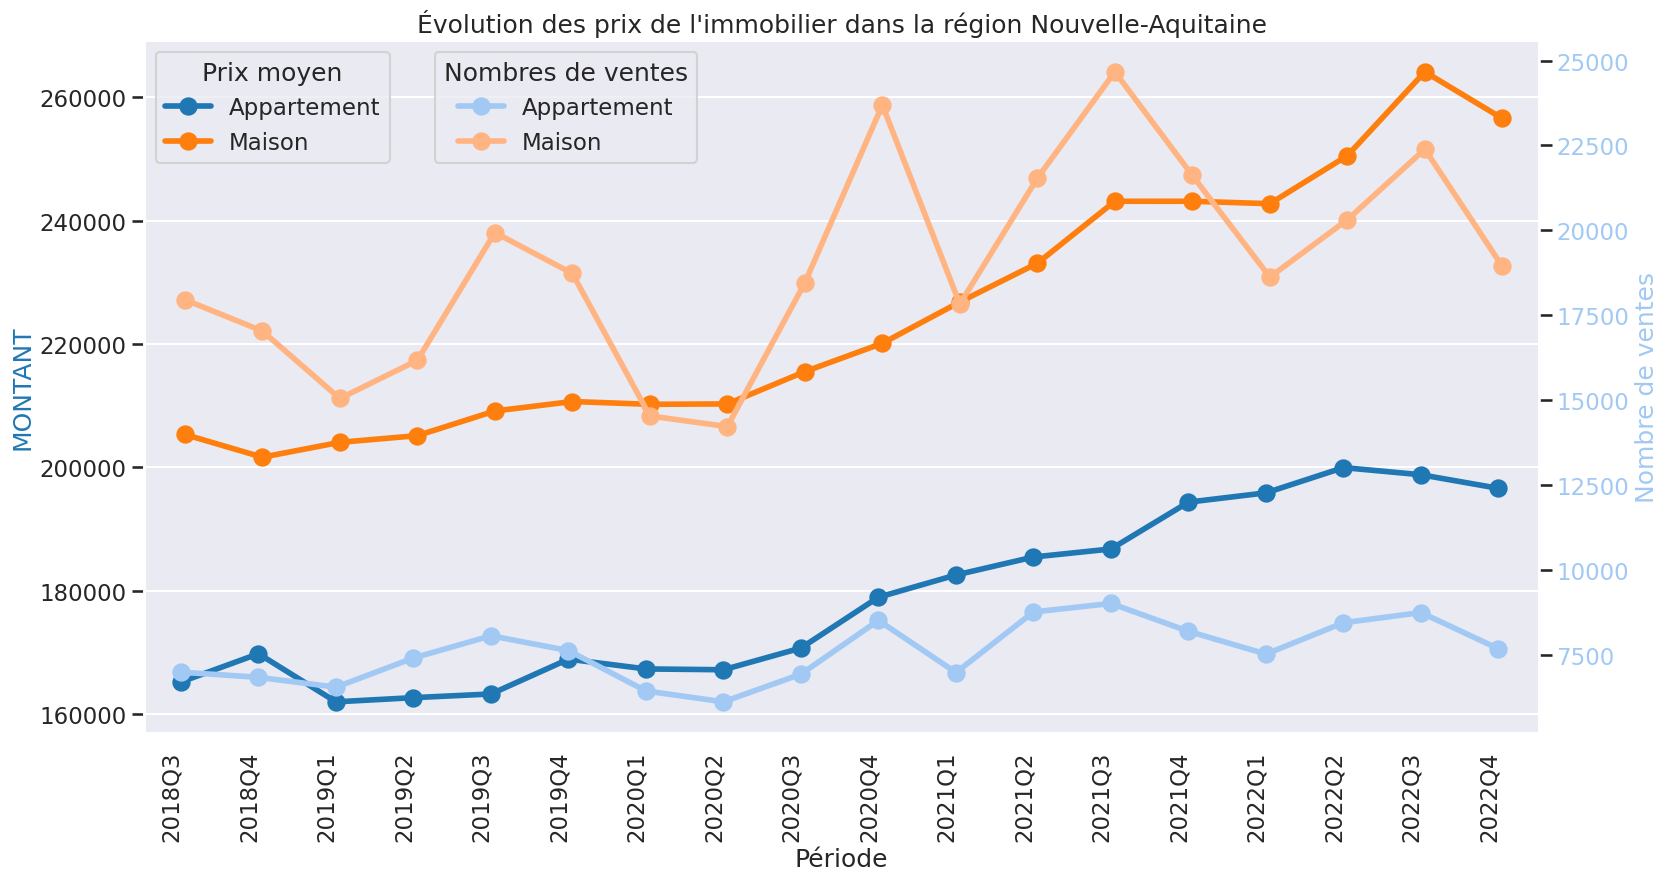

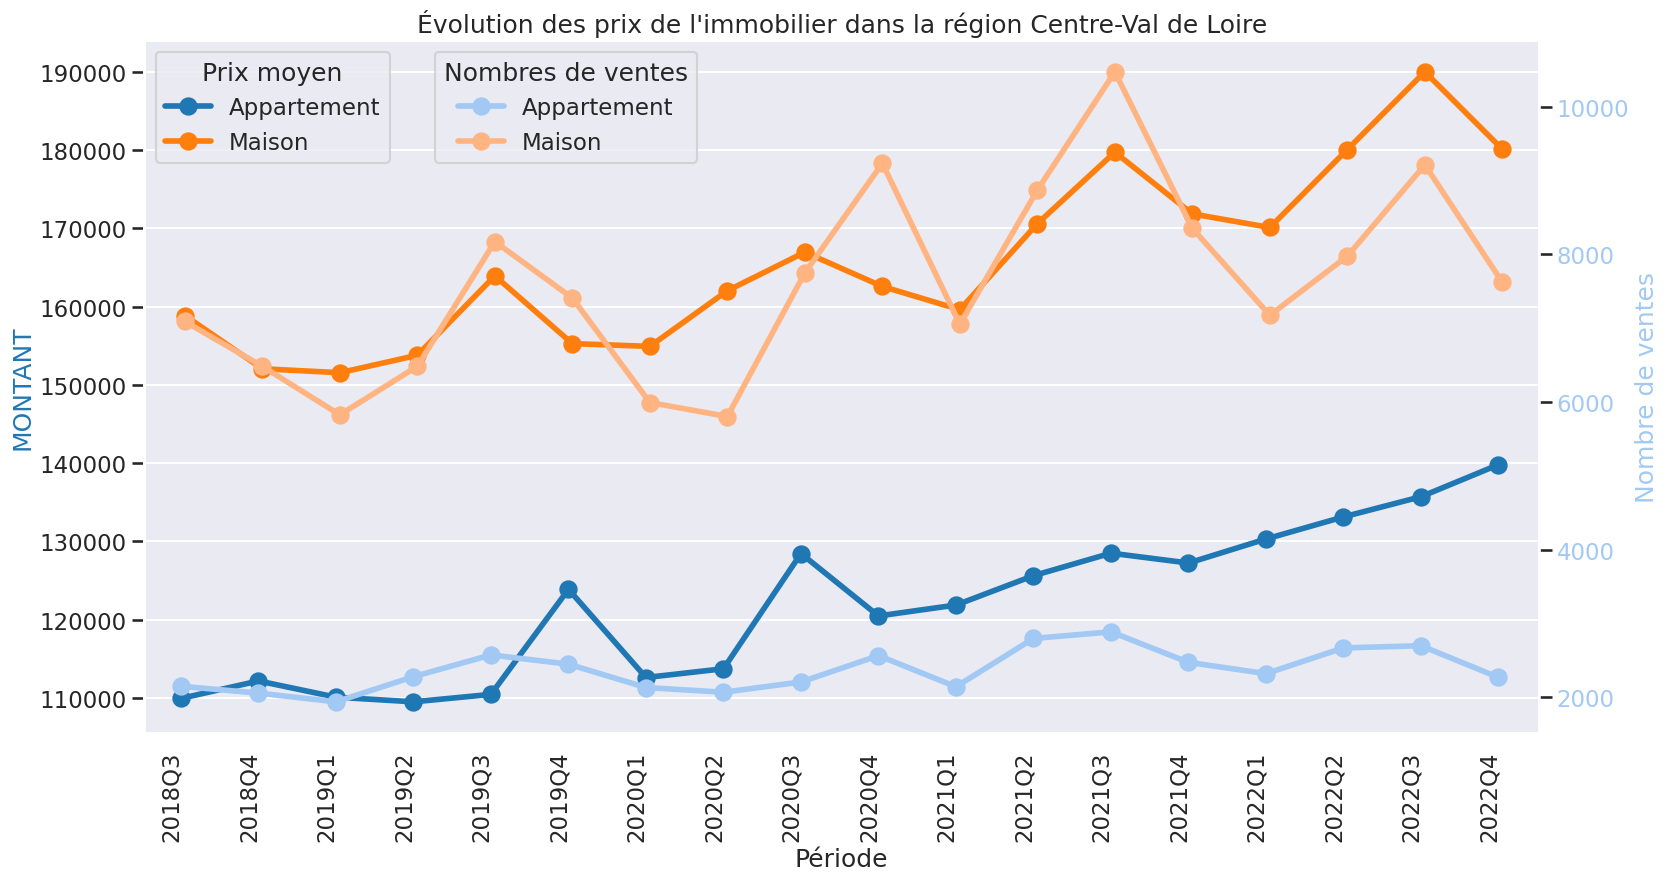

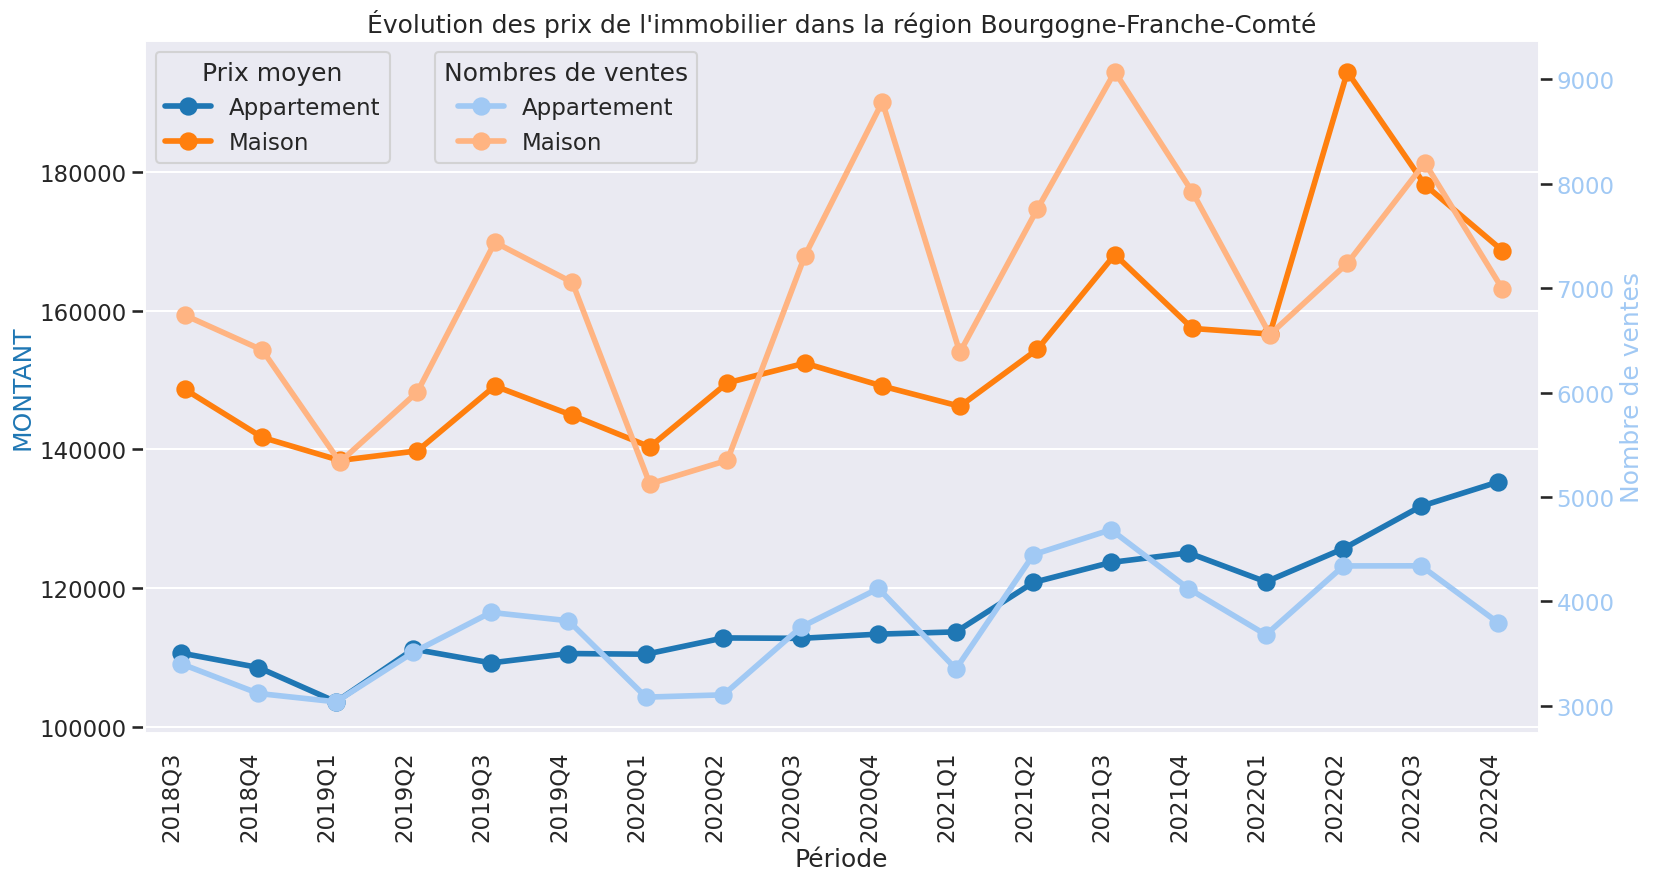

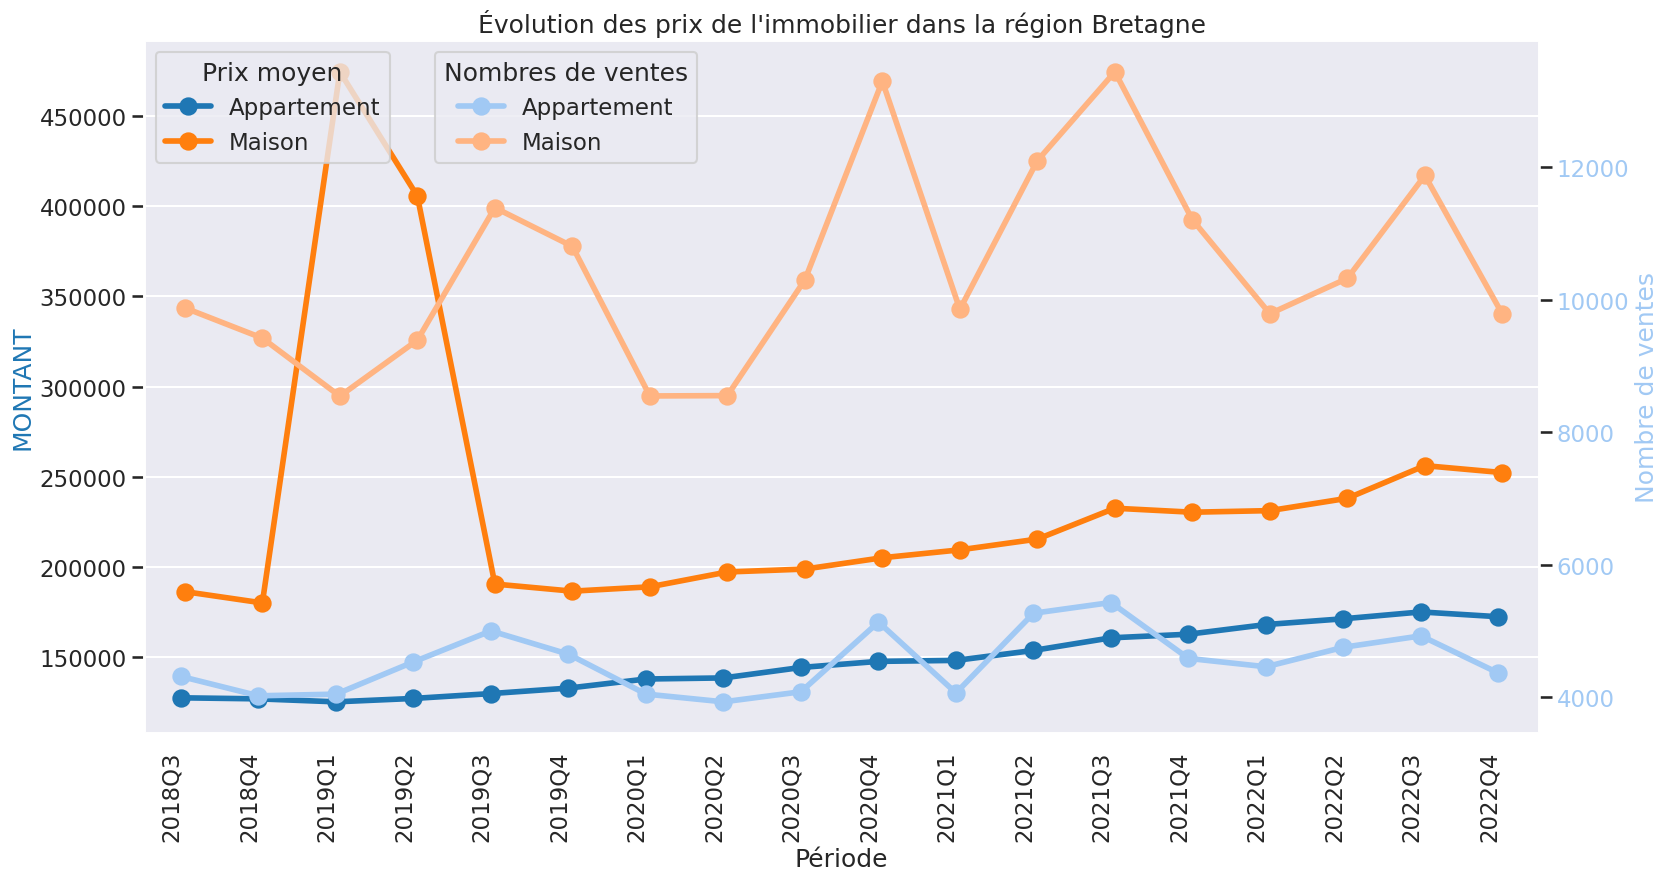

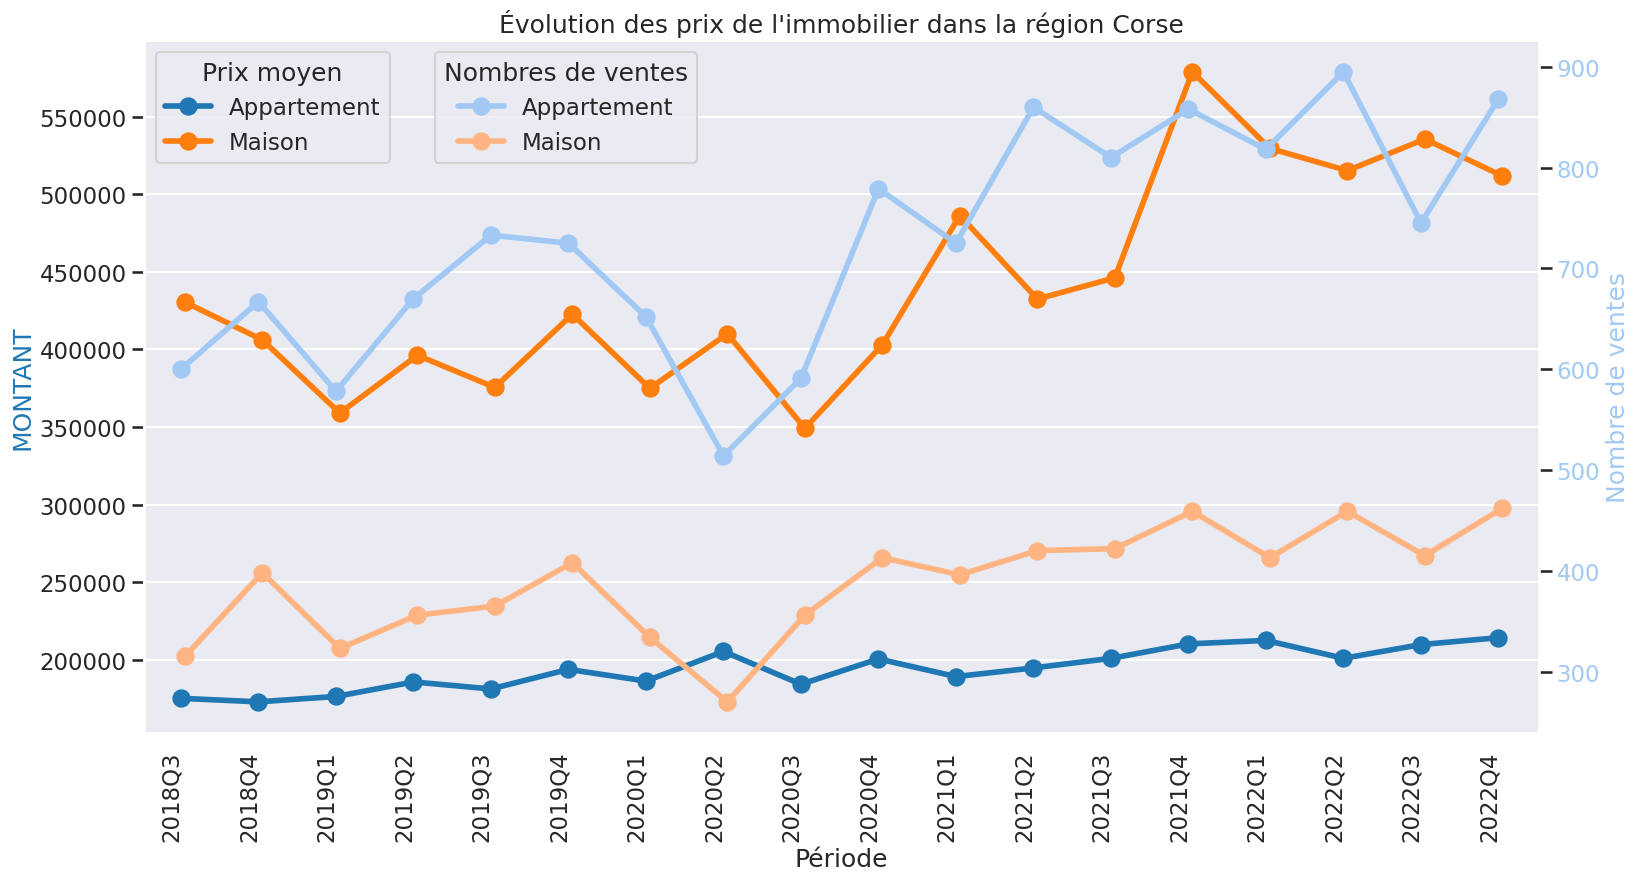

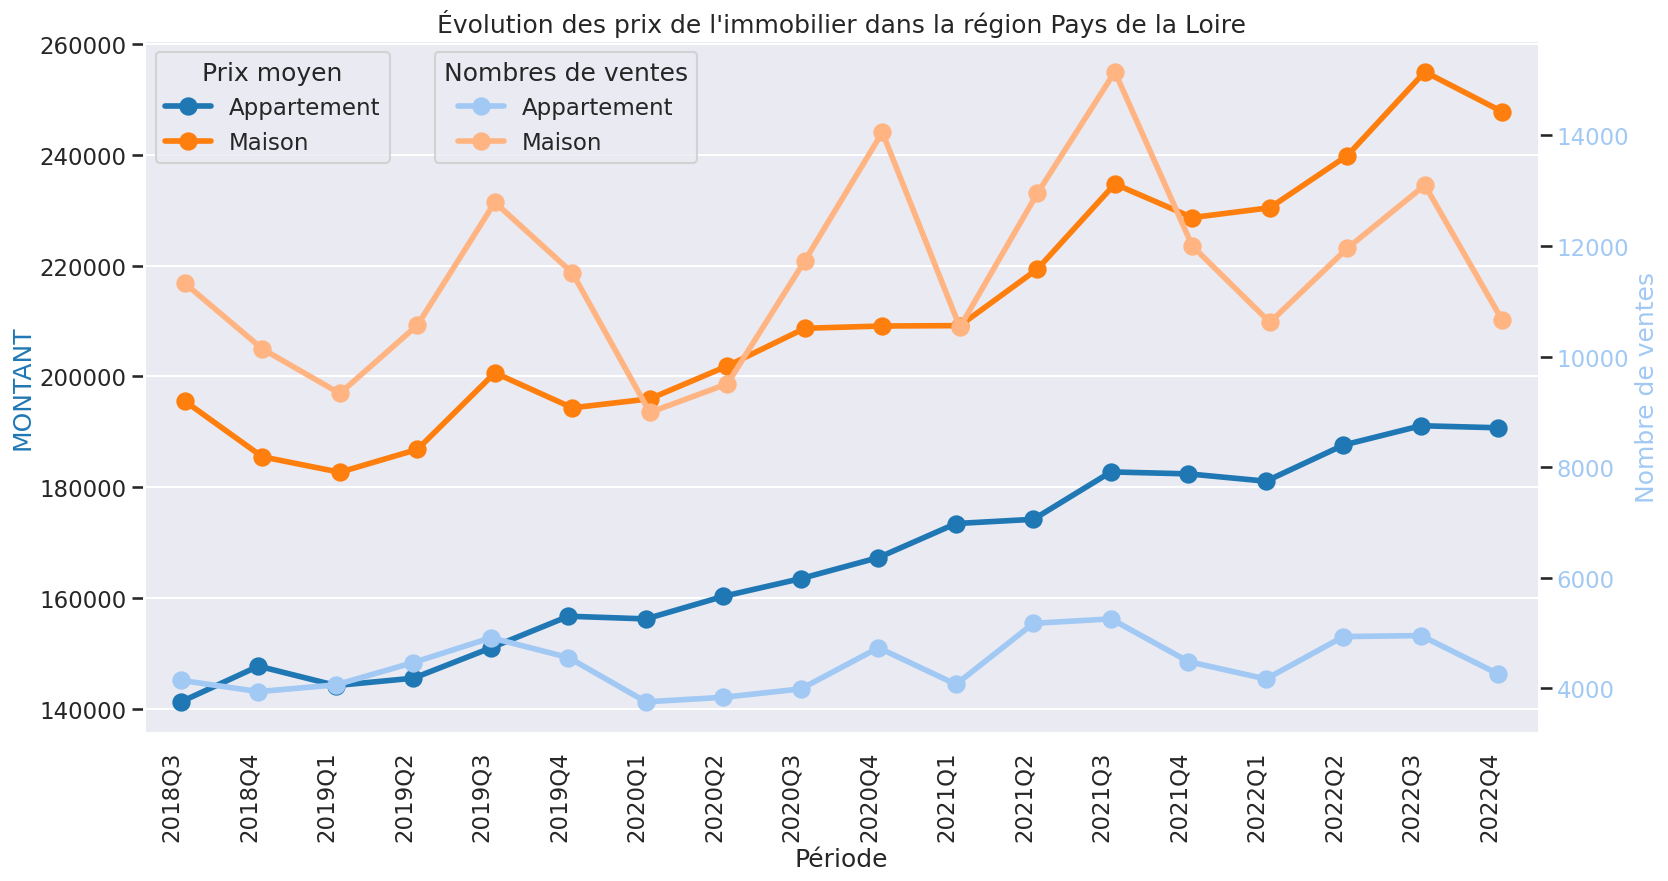

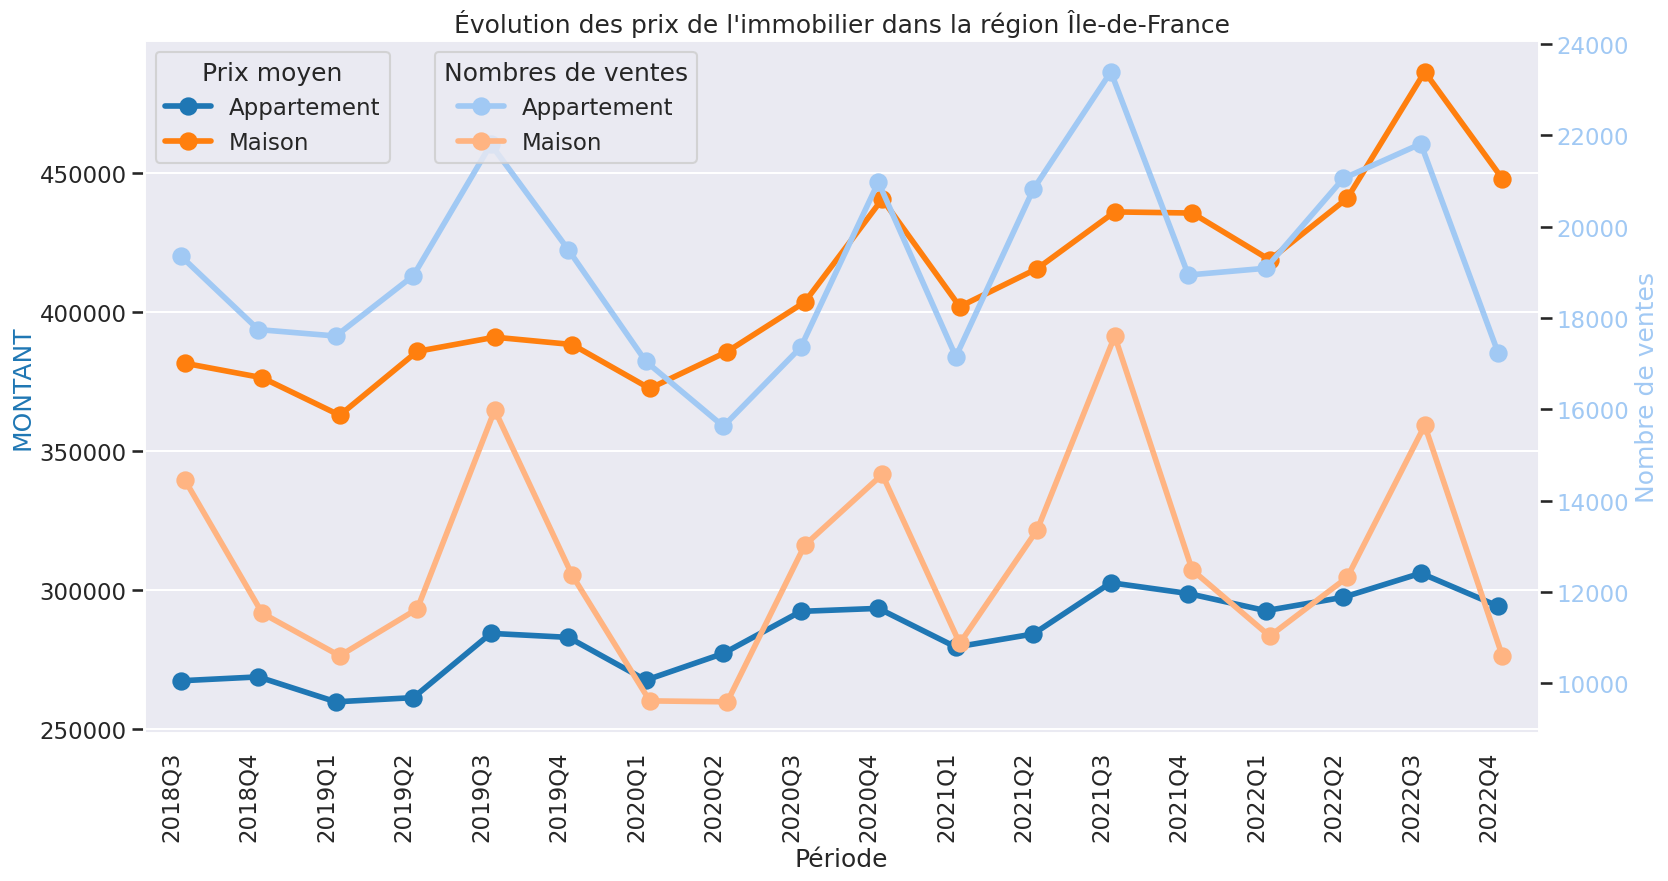

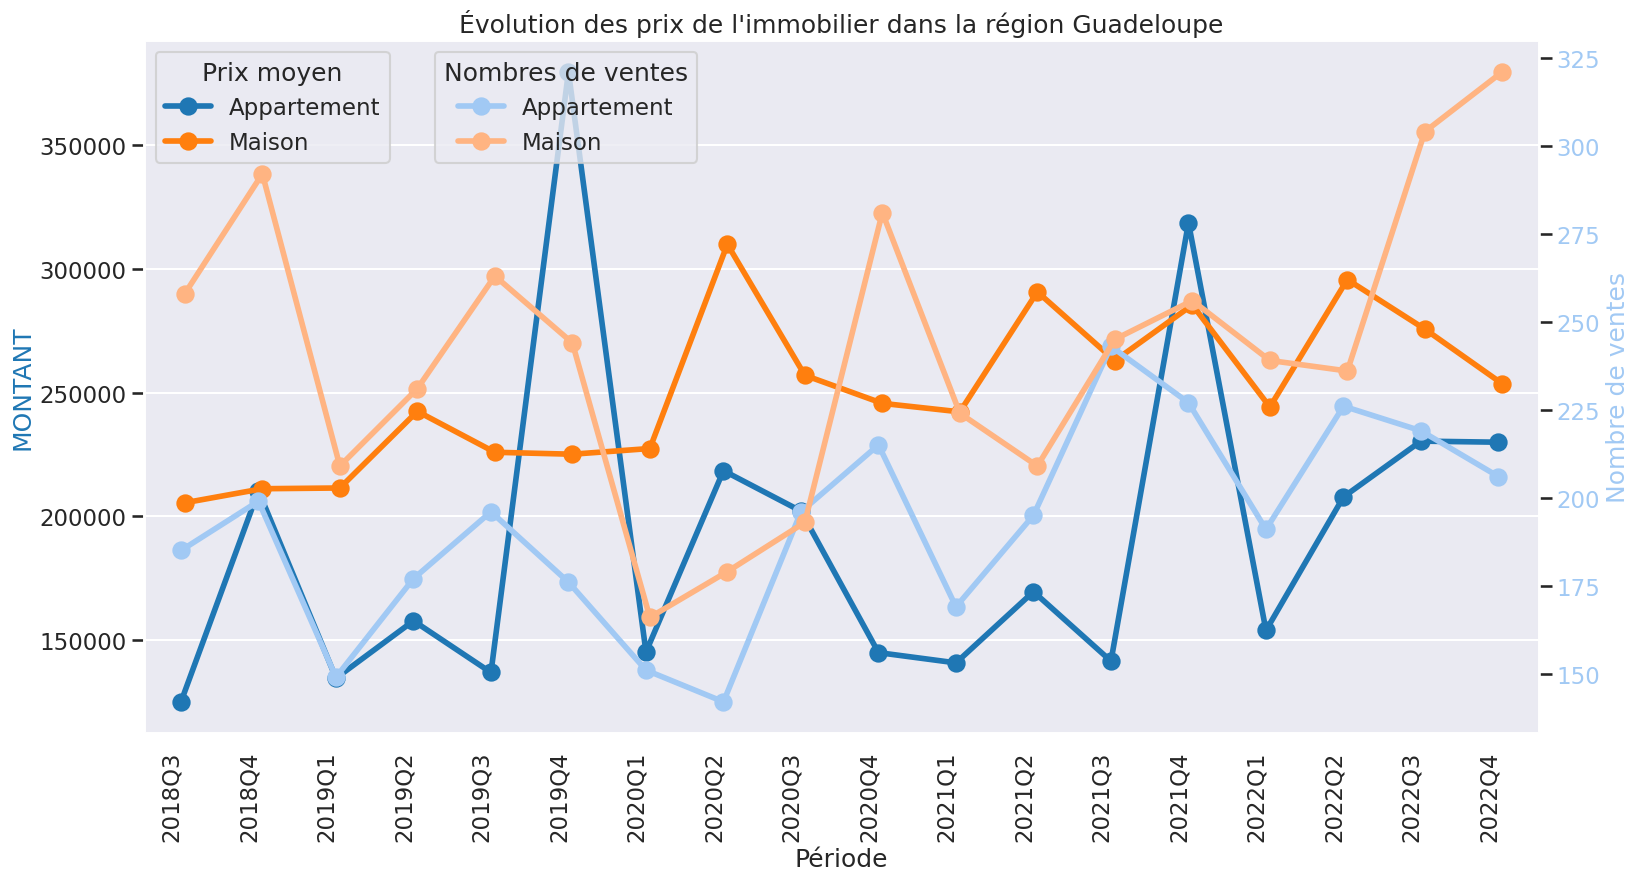

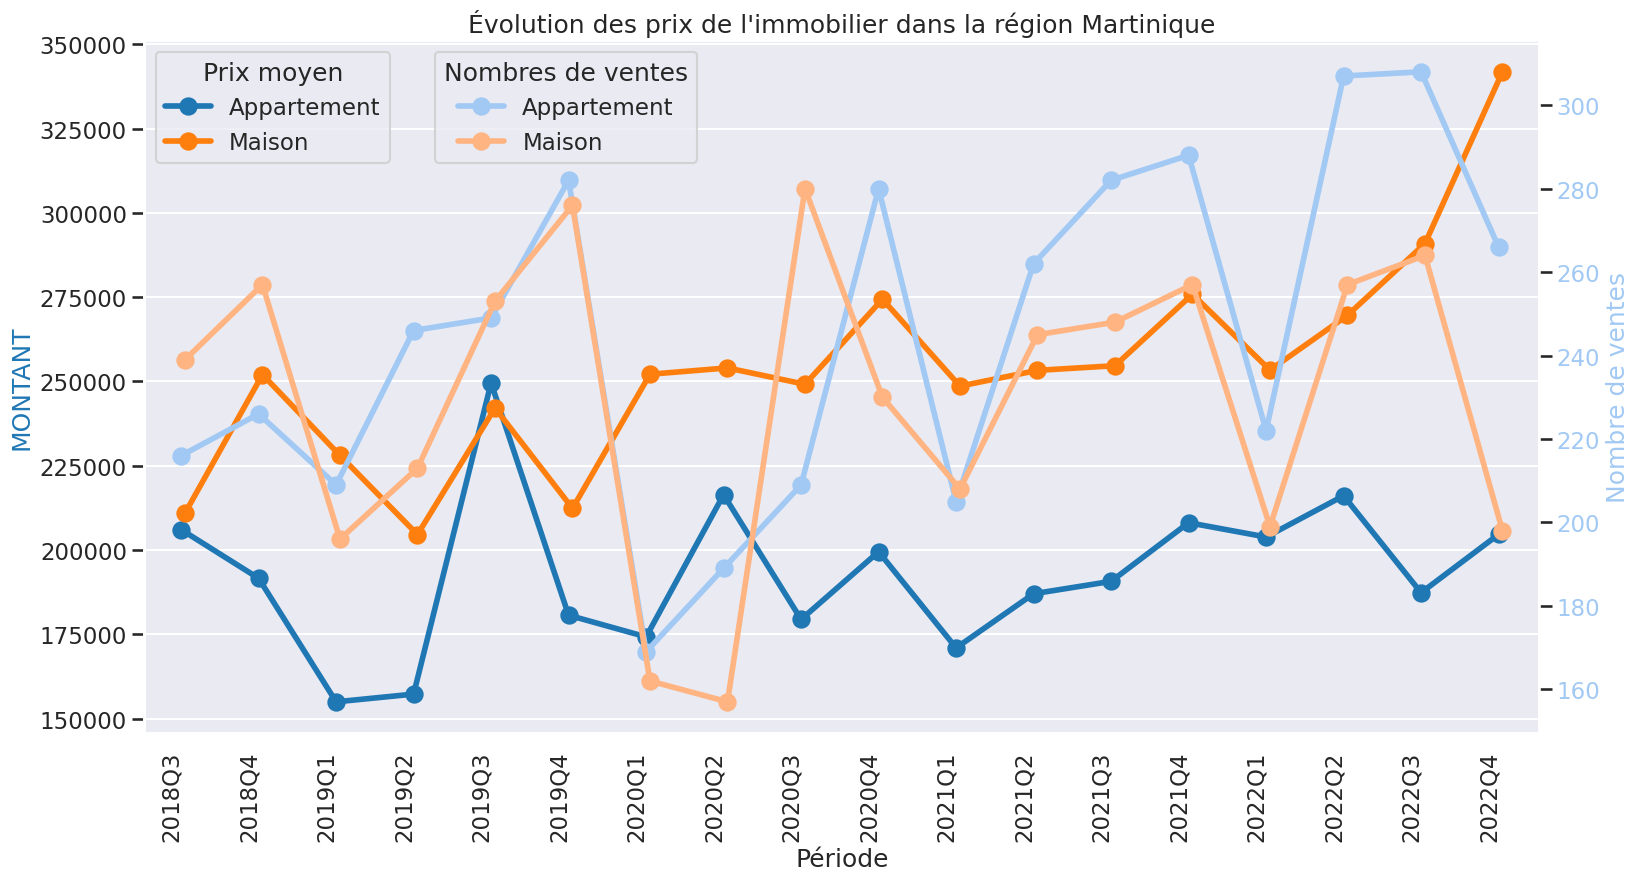

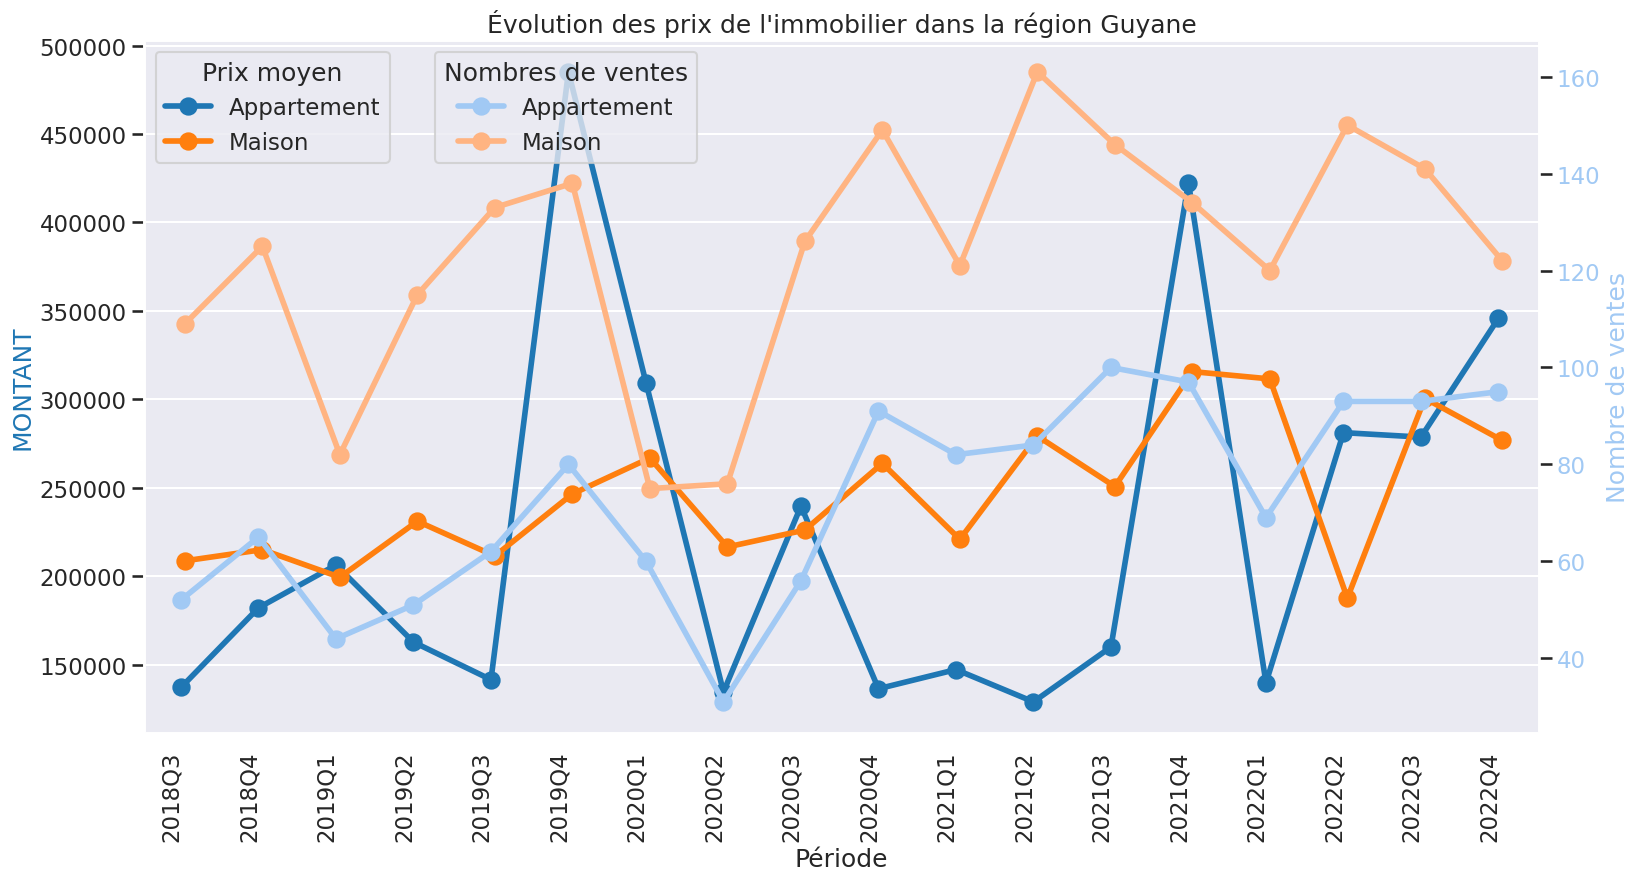

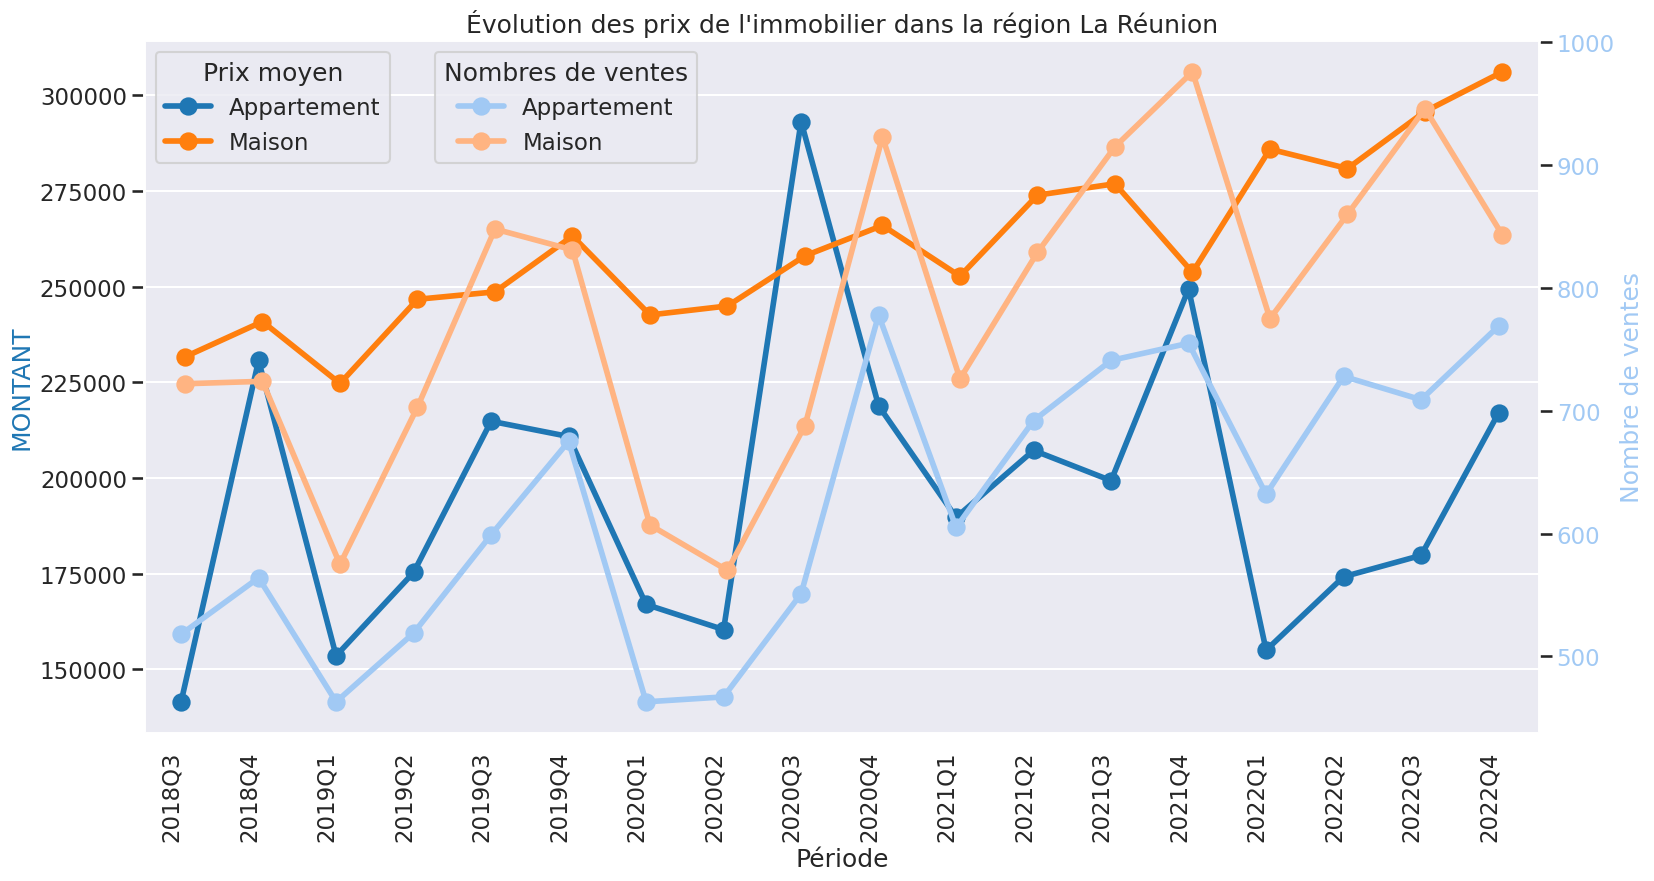

In [82]:
for region in liste_regions:
    # Sélection des données
    df_temp = df.loc[df.Name_region == region, ['Trimestre', 'NAME_TYPE_BIEN', 'MONTANT']]
    # Groupement sur la période et le type de bien, en ajoutant une colonne 'COUNT'
    df_temp = df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).agg(MONTANT=('MONTANT', 'mean'), COUNT=('MONTANT', 'count')).reset_index()
    # Tri du data frame par ordre croissant
    df_temp = df_temp.sort_values(by='Trimestre')

    fig, host = plt.subplots(figsize=(18, 9))
    par = host.twinx()

    host.set_xlabel("Période")
    host.set_ylabel("MONTANT")
    par.set_ylabel("Nombre de ventes")

    p1 = sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN',
                  dodge=True, markers='o', linestyles='-', ax=host)
    p2 = sns.pointplot(data=df_temp, x='Trimestre', y='COUNT', hue='NAME_TYPE_BIEN',
                  dodge=True, markers='o', linestyles='-', palette="pastel", ax=par)

    host.yaxis.get_label().set_color(p1.lines[0].get_color())
    par.yaxis.get_label().set_color(p2.lines[0].get_color())

    # Changer la couleur des nombres de ventes (labels de l'axe y de l'axe par)
    par.tick_params(axis='y', labelcolor=p2.lines[0].get_color())

    # Supprimer les lignes de grille
    host.xaxis.grid(False)
    par.yaxis.grid(False)

    # xlabels à la verticale
    xticklabels = df_temp['Trimestre'].unique()
    xticks_positions = range(len(xticklabels))
    
    host.set_xticks(xticks_positions)
    host.set_xticklabels(xticklabels, rotation=90, ha="right")

    # Titre
    host.set_title(f"Évolution des prix de l'immobilier dans la région {region}")

    # Légendes en dehors du graphique
    host.legend(loc='upper left', bbox_to_anchor=(0, 1), title='Prix moyen')
    par.legend(loc='upper left', bbox_to_anchor=(0.2, 1), title='Nombres de ventes')

    plt.show()

### Conclusion :
- On retrouve notre maison la plus cher dans l'evolution du prix dans la région Bretagne  
=> Regarder les prix sur la région Bretagne aux 1er et 2éme trimestre 2019 pour Nettoyage
- Les départements d'outre-mer pnt un volume très inférieur à ceux de métropole ce qui rend la moyenne de pris au trimestre beaucoup plus volatile.
- On peut visualiser le phénomène d'offres et de demandes, généralement le prix moyen d'un appartement ou d'une maison évolue de la même manière que le nombre de ventes
- Les prix moyen d'un bien est différent d'une région à l'autre  
=> La variable REGION peut être une variable intéressante pour la création d'un modèle
- Les prix peuvent également évoluer différemment entre un appartement et une maison  
=> Il sera préférable de faire un modèle pour les appartements et un modèle pour les maison pour plus de précision sur la prédiction.

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Recherche approfondie des valeurs extremes et des incohérence dans la régions Bretagne</h1>
</div>
<br>

### On sait que les caractéristiques principales pour l'estimation d'un bien et le lieu, la surface
### Le graphique ci-dessous représente le prix en fonction de la surface en région Bretagne

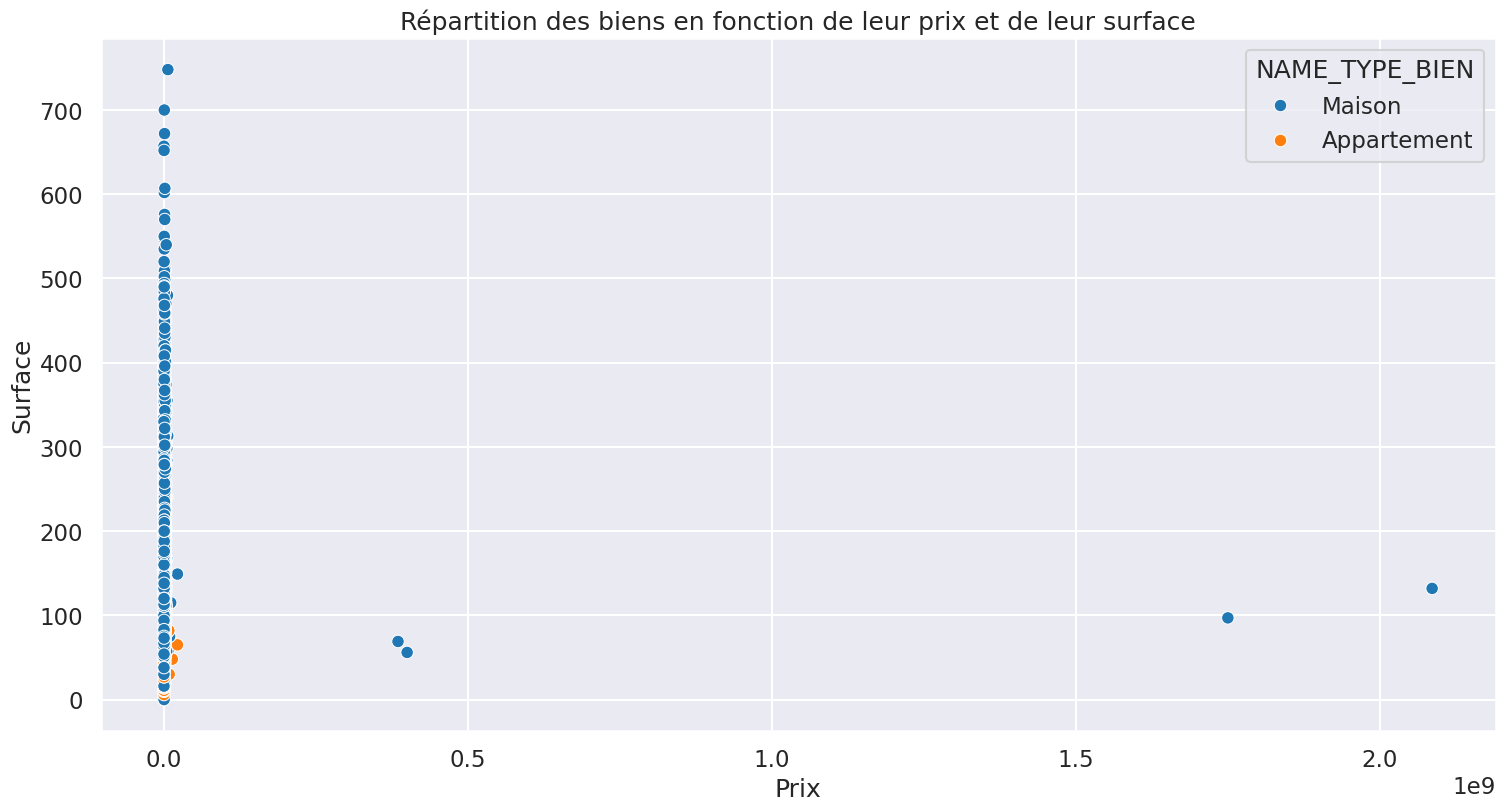

In [83]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=df.loc[df.Name_region=="Bretagne",:],x="MONTANT",y="SURFACE_BATI",hue="NAME_TYPE_BIEN")
plt.xlabel("Prix")
plt.ylabel("Surface")
plt.title("Répartition des biens en fonction de leur prix et de leur surface")
plt.show()

### Dans le graphique ci dessus on voit clairement que 5 maisons on un pris complètement in cohérent
### => Retracement du graphique en supprimant les données incohérentes

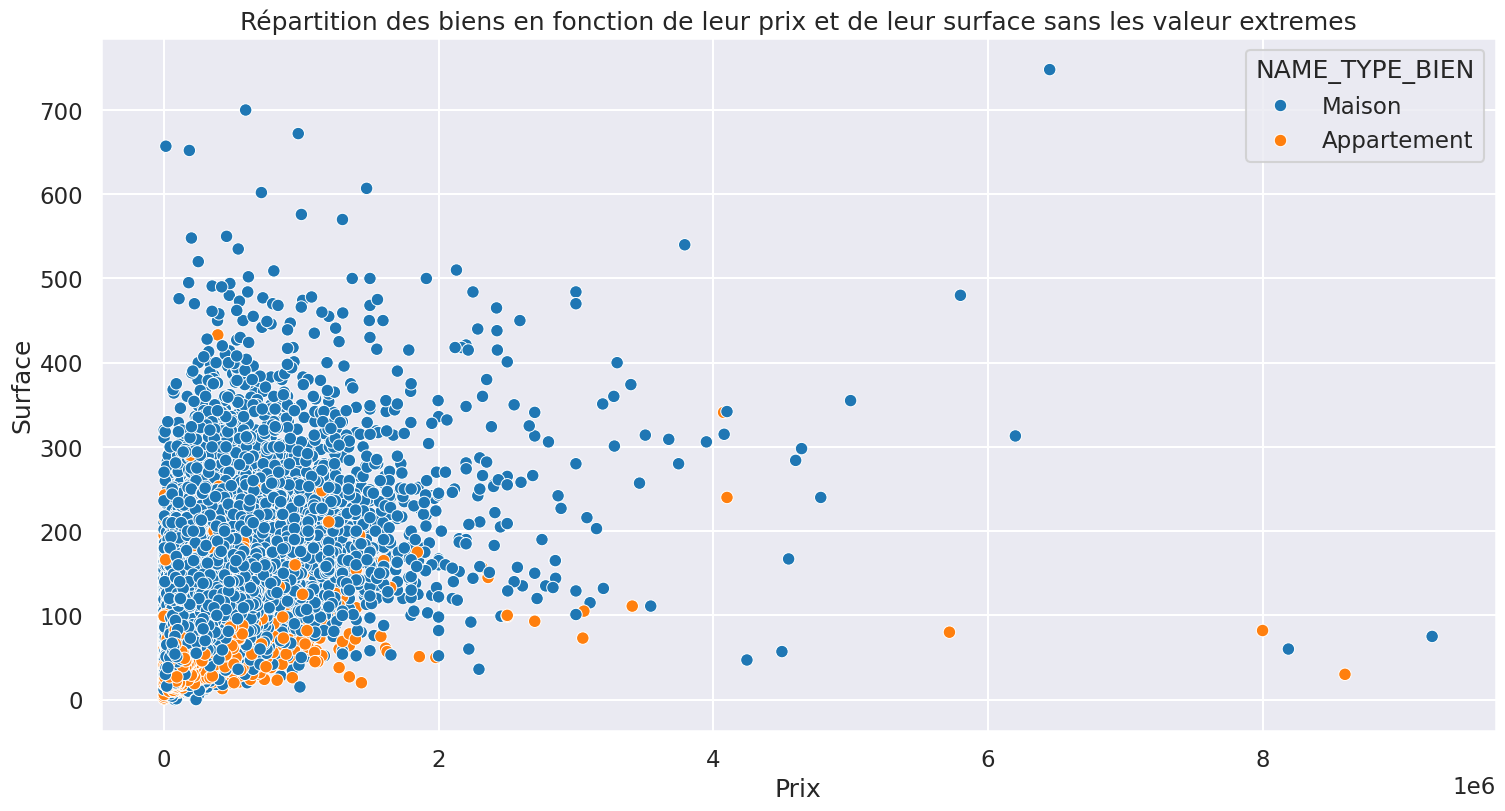

In [84]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=df.loc[(df.Name_region=="Bretagne")&(df.MONTANT<0.1e8),:],x="MONTANT",y="SURFACE_BATI",hue="NAME_TYPE_BIEN")
plt.xlabel("Prix")
plt.ylabel("Surface")
plt.title("Répartition des biens en fonction de leur prix et de leur surface sans les valeur extremes")
plt.show()

### Les données ci-dessus semblent déjà plus correctes même si un bien en dessous de 100m2 pour plus de 8 000 000 semble exagéré pour la région Bretagne
### Ci dessous le retracement de l'évolution des prix sur la région Bretagne en enlevant les valeurs extremes.

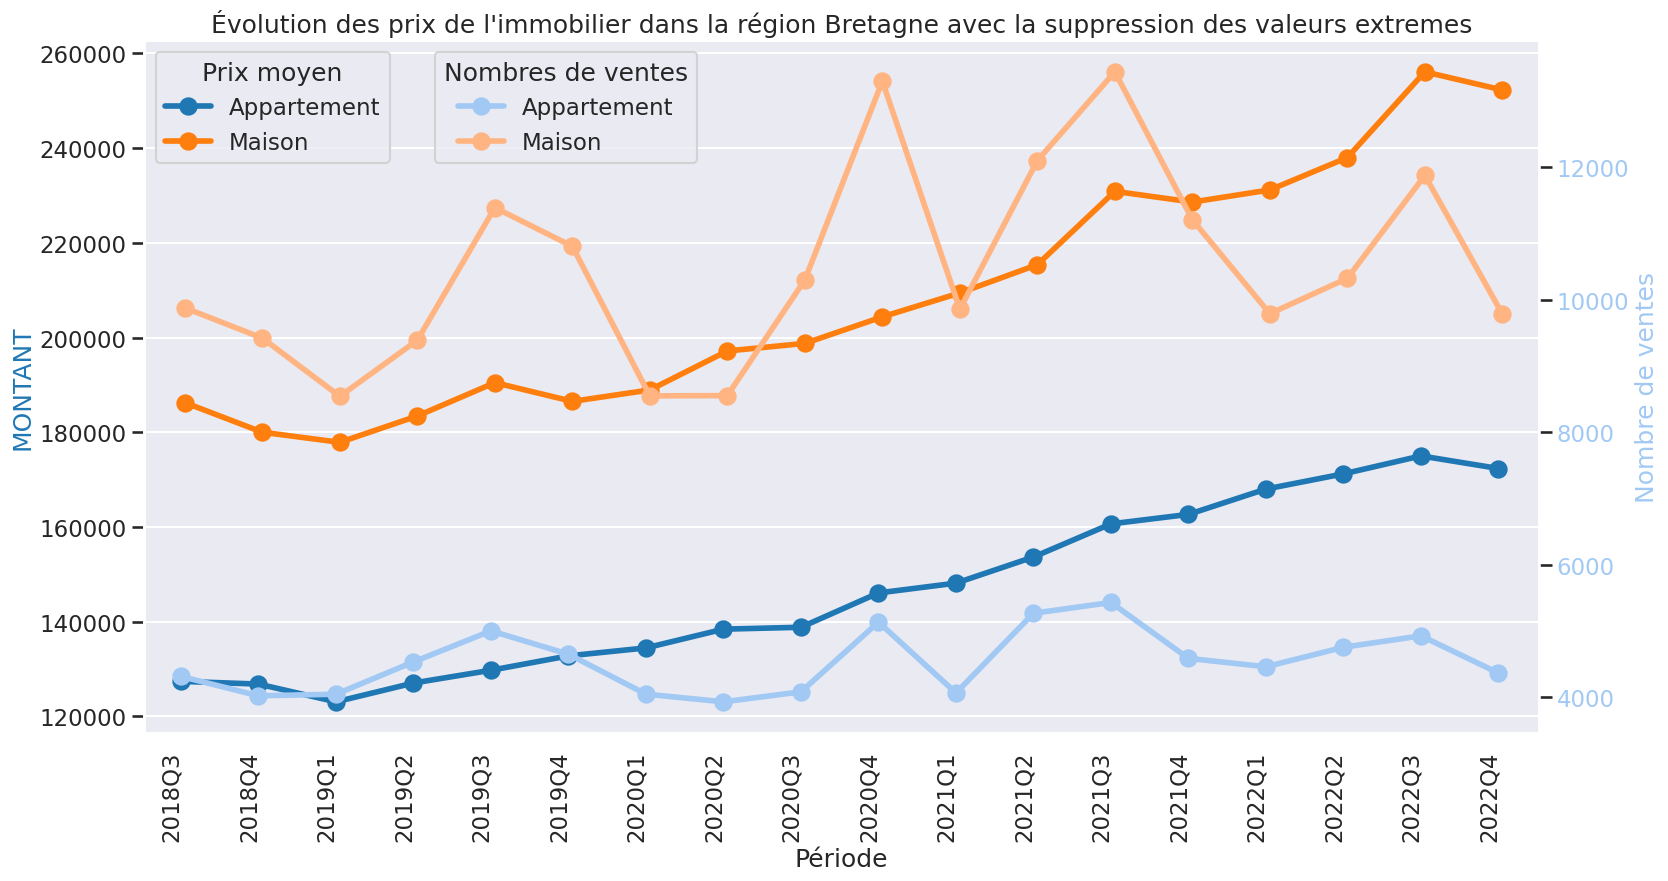

In [85]:
# Sélection des données
df_temp = df.loc[(df.Name_region == 'Bretagne') &(df.MONTANT<7.5e6), ['Trimestre', 'NAME_TYPE_BIEN', 'MONTANT']]
# Groupement sur la période et le type de bien, en ajoutant une colonne 'COUNT'
df_temp = df_temp.groupby(['Trimestre', 'NAME_TYPE_BIEN']).agg(MONTANT=('MONTANT', 'mean'), COUNT=('MONTANT', 'count')).reset_index()
# Tri du data frame par ordre croissant
df_temp = df_temp.sort_values(by='Trimestre')

fig, host = plt.subplots(figsize=(18, 9))
par = host.twinx()

host.set_xlabel("Période")
host.set_ylabel("MONTANT")
par.set_ylabel("Nombre de ventes")

p1 = sns.pointplot(data=df_temp, x='Trimestre', y='MONTANT', hue='NAME_TYPE_BIEN',
                dodge=True, markers='o', linestyles='-', ax=host)
p2 = sns.pointplot(data=df_temp, x='Trimestre', y='COUNT', hue='NAME_TYPE_BIEN',
                dodge=True, markers='o', linestyles='-', palette="pastel", ax=par)

host.yaxis.get_label().set_color(p1.lines[0].get_color())
par.yaxis.get_label().set_color(p2.lines[0].get_color())

# Changer la couleur des nombres de ventes (labels de l'axe y de l'axe par)
par.tick_params(axis='y', labelcolor=p2.lines[0].get_color())

# Supprimer les lignes de grille
host.xaxis.grid(False)
par.yaxis.grid(False)

# xlabels à la verticale
xticklabels = df_temp['Trimestre'].unique()
xticks_positions = range(len(xticklabels))

host.set_xticks(xticks_positions)
host.set_xticklabels(xticklabels, rotation=90, ha="right")

# Titre
host.set_title(f"Évolution des prix de l'immobilier dans la région Bretagne avec la suppression des valeurs extremes")

# Légendes en dehors du graphique
host.legend(loc='upper left', bbox_to_anchor=(0, 1), title='Prix moyen')
par.legend(loc='upper left', bbox_to_anchor=(0.2, 1), title='Nombres de ventes')

plt.show()

### Conclusion : la suppression des valeurs extremes nous permet d'avoir une courbe de l'évolution des prix cohérente.  
=> Ces biens seront donc supprimés pour la création du modèle

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Visualisation des prix à l'échelle de la commune</h1>
</div>

### La réalisation de cette carte interactive des prix sera effectuée avec la librairie folium de python.  
- 2 cartes seront créées, une pour les maisons et une pour les appartements
- L'utilisation des quantiles permettra de visualiser les prix avec 4 couleurs différentes 

In [86]:
import folium

# Pour des raisons de mémoire de l'ordinateur le baromètre des prix sera effectué par commune
# Les données seront groupées par ID_COMMUNE et la position GPS sera la moyenne des points de la commune
# Le prix sera donc également la moyenne sur la commune
# Pour des raisons d'affichage sur la carte il n'y aura que la métropole 


for type_bien in ["Maison","Appartement"]:
    # Sélection des données
    df_temp = df.loc[(df.NAME_TYPE_BIEN==type_bien) & (~df.Name_region.isin(['Guadeloupe', 
                                                                            'Martinique', 
                                                                            'Guyane', 
                                                                            'La Réunion'])),
                     ["ID_COMMUNE","LONGITUDE", "LATITUDE", "MONTANT"]]

    # Groupement des données 
    df_temp = df_temp.groupby("ID_COMMUNE").agg({ "LONGITUDE": "mean",  
                                                        "LATITUDE": "mean",   
                                                        "MONTANT": "mean"
                                                        }).reset_index()
    # Point central de la carte
    carte = folium.Map(location=[df_temp['LATITUDE'].mean(), df_temp['LONGITUDE'].mean()], 
                        zoom_start=6)

    # Calcul des quartiles
    quartiles = df_temp['MONTANT'].quantile([0, 0.25, 0.5, 0.75, 1]).astype(int)

    # Ajout de cercles sur la carte avec un code couleur en fonction des quartiles
    for _, row in df_temp.iterrows():
        if row['MONTANT'] <= quartiles[0.25]:
            couleur = 'green'
        elif quartiles[0.25] < row['MONTANT'] <= quartiles[0.5]:
            couleur = 'orange'
        elif quartiles[0.5] < row['MONTANT'] <= quartiles[0.75]:
            couleur = 'red'
        else:
            couleur = '#8B0000'

        folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], 
                            radius=1,
                            color=couleur,
                            fill=True,
                            fill_color=couleur,
                            fill_opacity=0.7).add_to(carte)
        
    # Ajout de la légende avec des couleurs
    legend_html = """
         <div style="position: fixed; 
                     bottom: 50px; left: 50px; width: 400px; height: 74px; 
                     border:2px solid grey; z-index:9999; font-size:14px;
                     background-color:white; opacity: 0.8;
                     ">
         &nbsp; <b>Legend</b><br>

         <table>
            <tr>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black">0 - {}</td>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black">{} - {}</td>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black">{} - {}</td>
            <td style="width: 100px; flex: 1;background-color: {}; text-align: center;color : black"> > {} </td>
            </tr>
        </table>
         
         </div>
         """.format('green', quartiles[0.25], 
                    'orange', quartiles[0.25], quartiles[0.5],  
                    'red', quartiles[0.5], quartiles[0.75], 
                    '#8B0000', quartiles[0.75])

    carte.get_root().html.add_child(folium.Element(legend_html))

    # Enregistrement de la carte au format HTML
    carte.save(f"carte_prix_metropole_{type_bien}.html")

### Capture d'écran de la carte interactive réalisée avec folium
![Screenshoot map_france](https://raw.githubusercontent.com/rastakoer/certif_app_immo/model/model/map_france_folium.PNG)

### Il est possible de tirer deux conclusions de ce graphique :
- Les grandes agglomérations comme par exemple Paris, Lyon, Bordeaux, Rennes, Caen... ont un prix de vente moyen élevé, il sera donc judicieux d'ajouter la densité de population (nombre d'habitants au km2).  
=> Ces données n'étant pas ajoutées dès le départ en base de données elles seront ajoutées lors de la construction d'un modèle plus performant
- Les villes côtières ont également un prix moyen plus élevé.  
=> Voir par la suite s'il existe un moyen de récupérer sur internet les villes côtières ou peut-être sue ces villes côtières ont également une densité de population élevée

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Évolution du prix en fonction de la surface d'un logement</h1>
</div>
<br>

In [87]:
df.head(1)

MONTANT  NUMERO_RUE               RUE  CODE_POSTAL  LONGITUDE  LATITUDE  \
0   450000         493  RTE DES GARAUDES         1400   4.920458  46.13316   

  DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  DEPENDANCES  \
0    2018-07-26           233          6            10800            0   

  ID_COMMUNE NAME_TYPE_BIEN             NAME_COMMUNE Name_departement  \
0      01001         Maison  L'Abergement-Clémenciat              Ain   

            Name_region Trimestre  
0  Auvergne-Rhône-Alpes    2018Q3

/tmp/ipykernel_12673/725276198.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


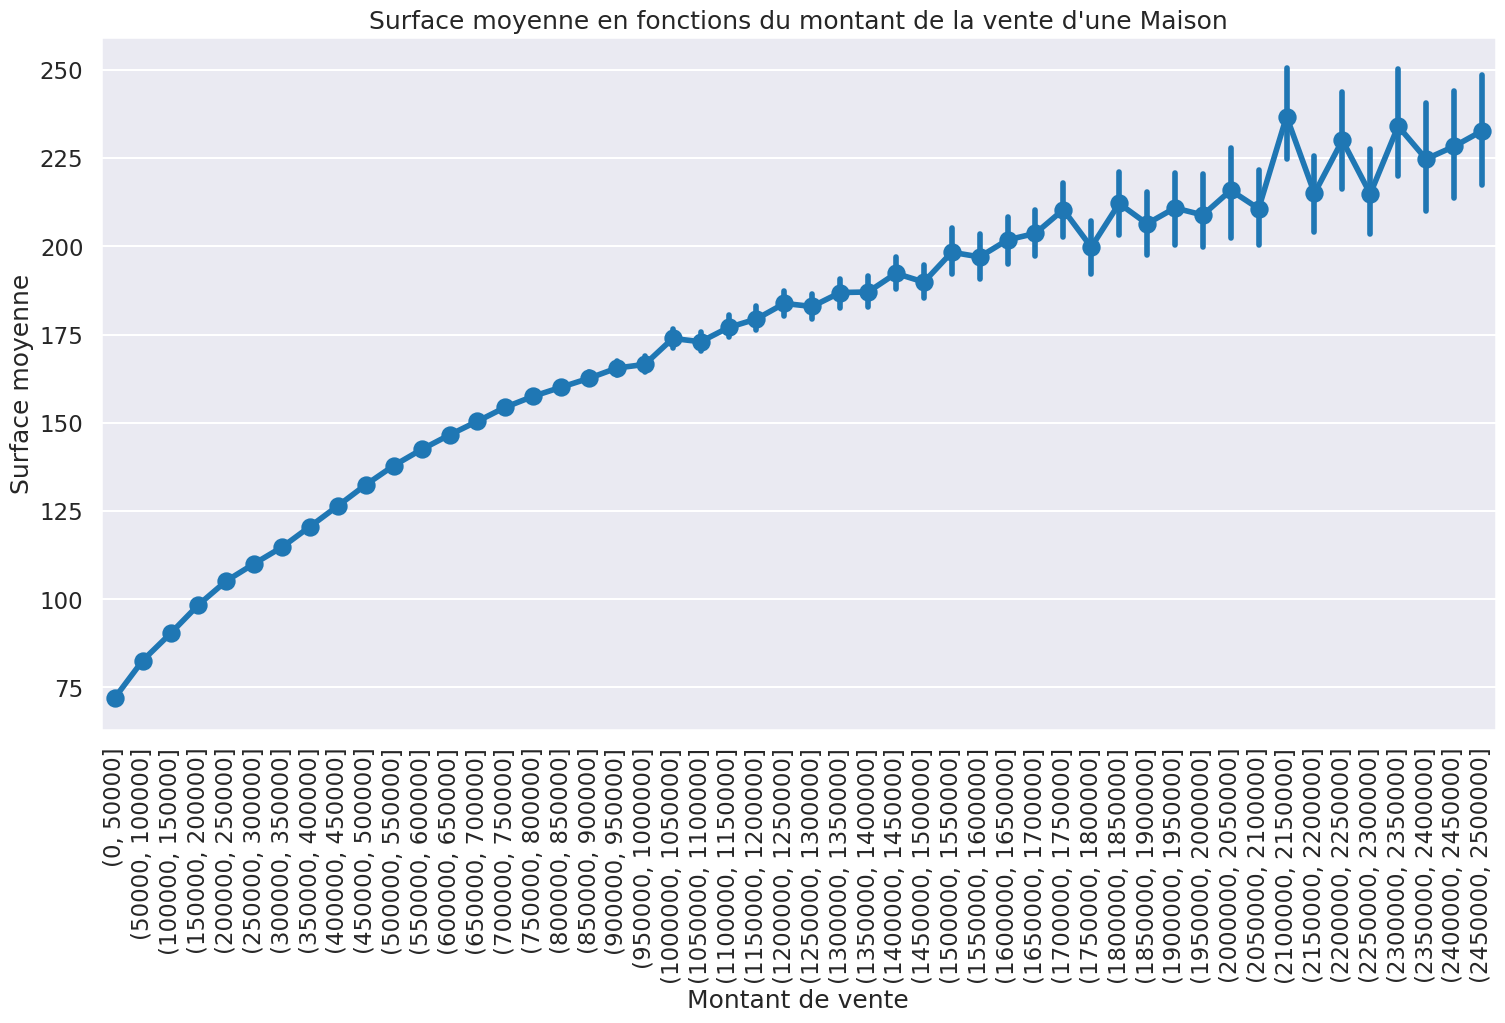

/tmp/ipykernel_12673/725276198.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


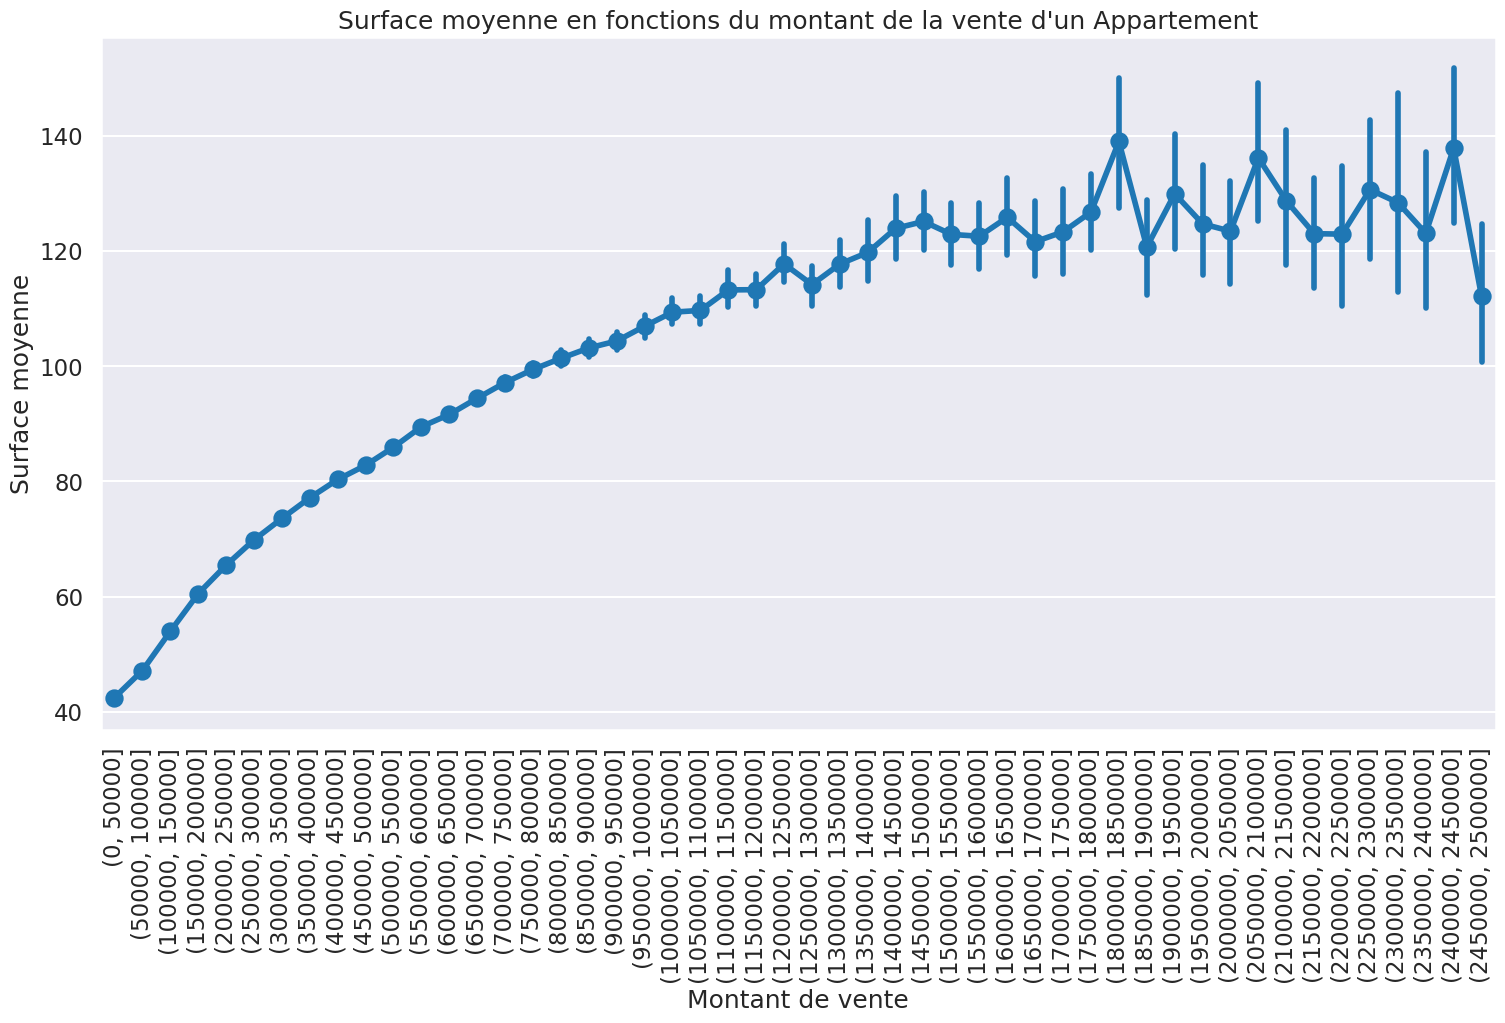

In [88]:
for type_bien in ["Maison","Appartement"]:

    # Sélection de la surface et du montant dans un data frame
    df_temp = df.loc[(df.MONTANT<=2500000) & (df.NAME_TYPE_BIEN==type_bien),
                        ["MONTANT","SURFACE_BATI"]]

    # Définition des bins pour les montants des ventes
    bins = [i for i in range(0,2550000,50000)]

    # Ajouter une colonne 'MontantVenteBin' au DataFrame en utilisant cut
    df_temp['MONTANT'] = pd.cut(df_temp['MONTANT'], bins=bins)


    plt.figure(figsize=(18, 9))
    ax = sns.pointplot(x='MONTANT', y='SURFACE_BATI', data=df_temp, estimator='mean')
    if type_bien == "Maison":
        plt.title(f"Surface moyenne en fonction du montant de la vente d'une Maison")
    else:
        plt.title(f"Surface moyenne en fonction du montant de la vente d'un Appartement")
    plt.xlabel('Montant de vente')
    plt.ylabel('Surface moyenne')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()



### Conclusion : L'évolution de la moyenne des prix évolue de façon linéaire pour une maison, plus le bien est grand plus le prix augmente. Pour un appartement on remarque un plateau, au-dessus d'1,5M€ le surface moyenne évolue entre 100 et 150m².
 

<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Évolution du prix d'un bien immobilier en fonction du nombre de pièces</h1>
</div>
<br>

/tmp/ipykernel_12673/1365882326.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


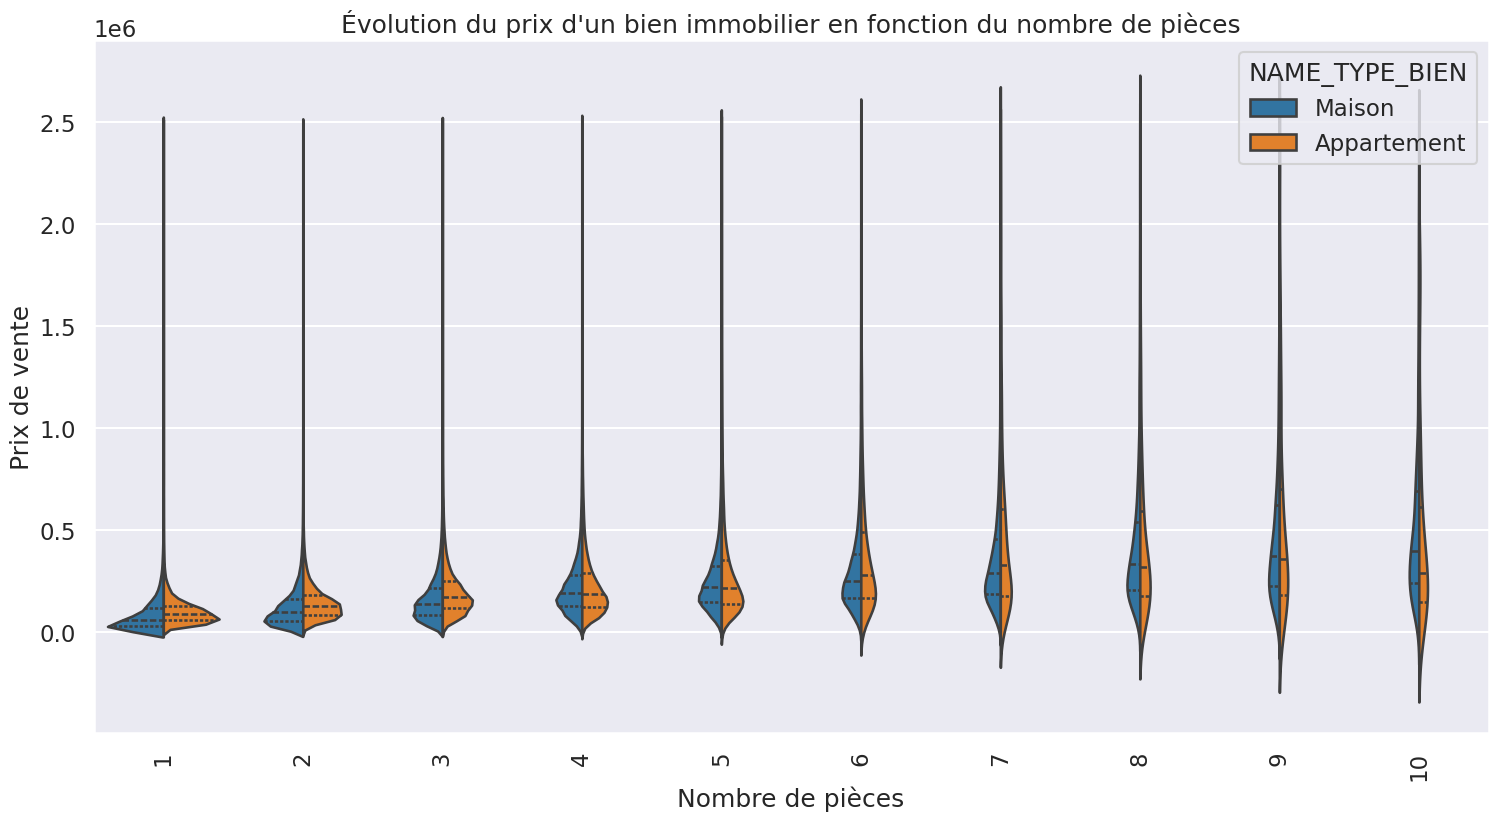

In [89]:
# Sélection du nombre de pièces et du montant dans un data frame
df_temp = df.loc[(df.MONTANT<=2500000) & (df.NB_PIECES<=10) & (df.NB_PIECES>0),["MONTANT","NB_PIECES","NAME_TYPE_BIEN"]]

plt.figure(figsize=(18, 9))
ax = sns.violinplot(data=df_temp, 
                    x="NB_PIECES", 
                    y="MONTANT", 
                    hue="NAME_TYPE_BIEN", 
                    split=True, 
                    inner="quart")
plt.title(f"Évolution du prix d'un bien immobilier en fonction du nombre de pièces")
plt.xlabel('Nombre de pièces')
plt.ylabel('Prix de vente')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Ici encore il est difficile de visualiser l'évolution en fonction du nombre de pièces en raison d'un prix fluctuant fortement d'une zone géographique à une autre

/tmp/ipykernel_12673/3966391815.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


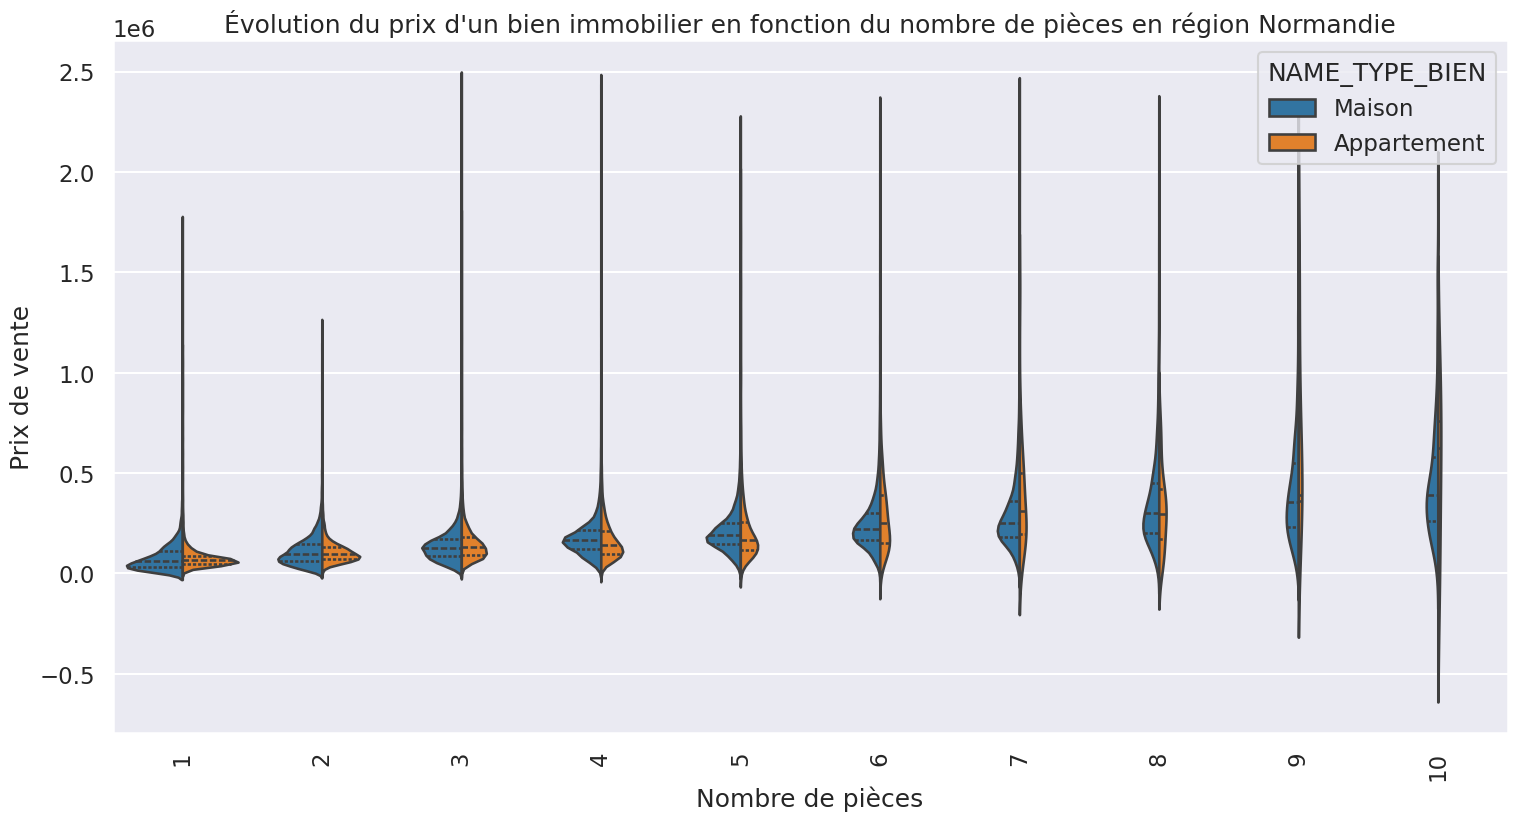

/tmp/ipykernel_12673/3966391815.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


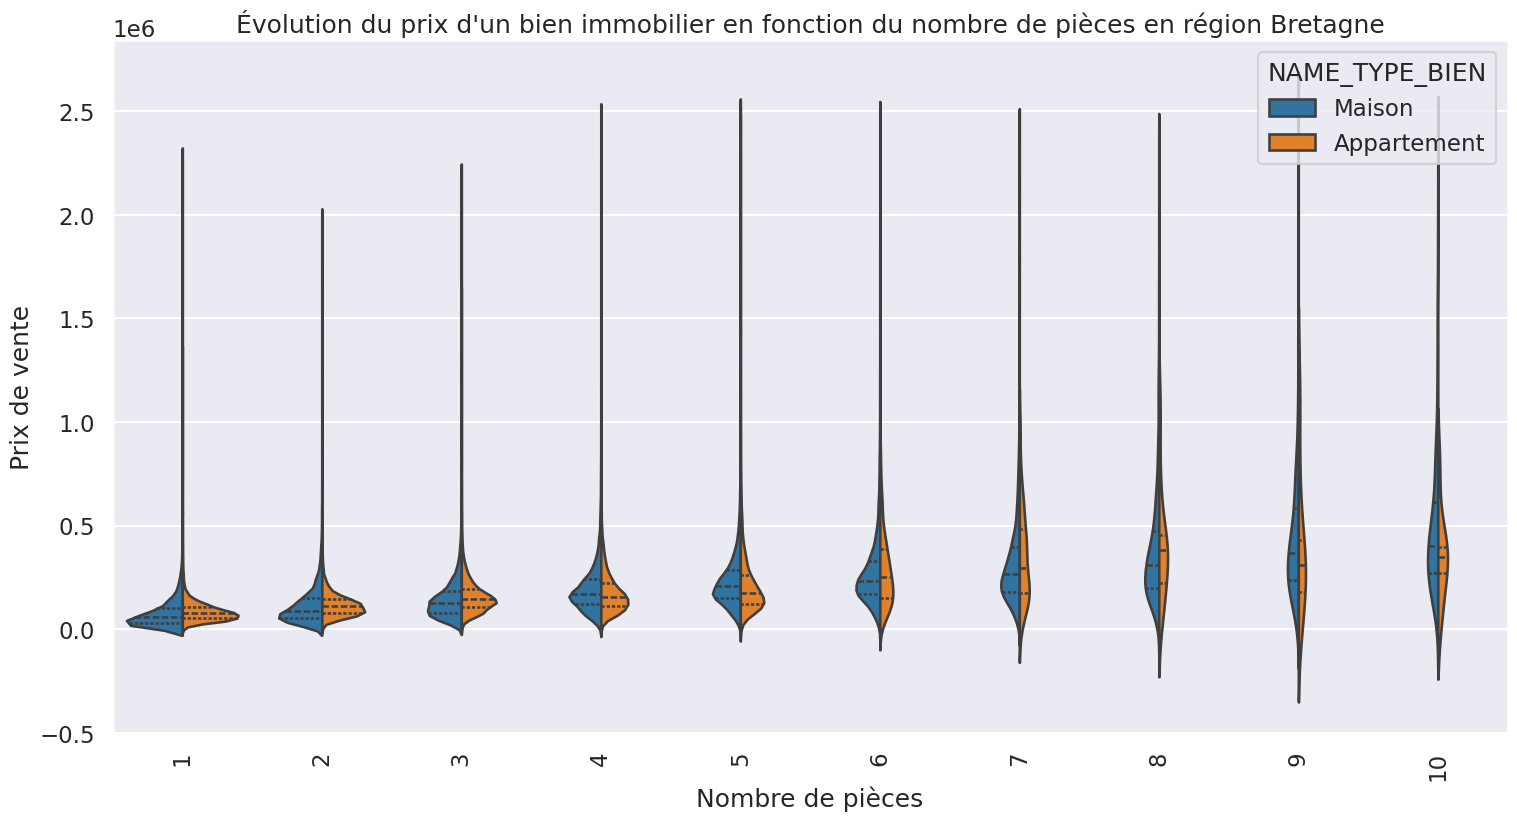

/tmp/ipykernel_12673/3966391815.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


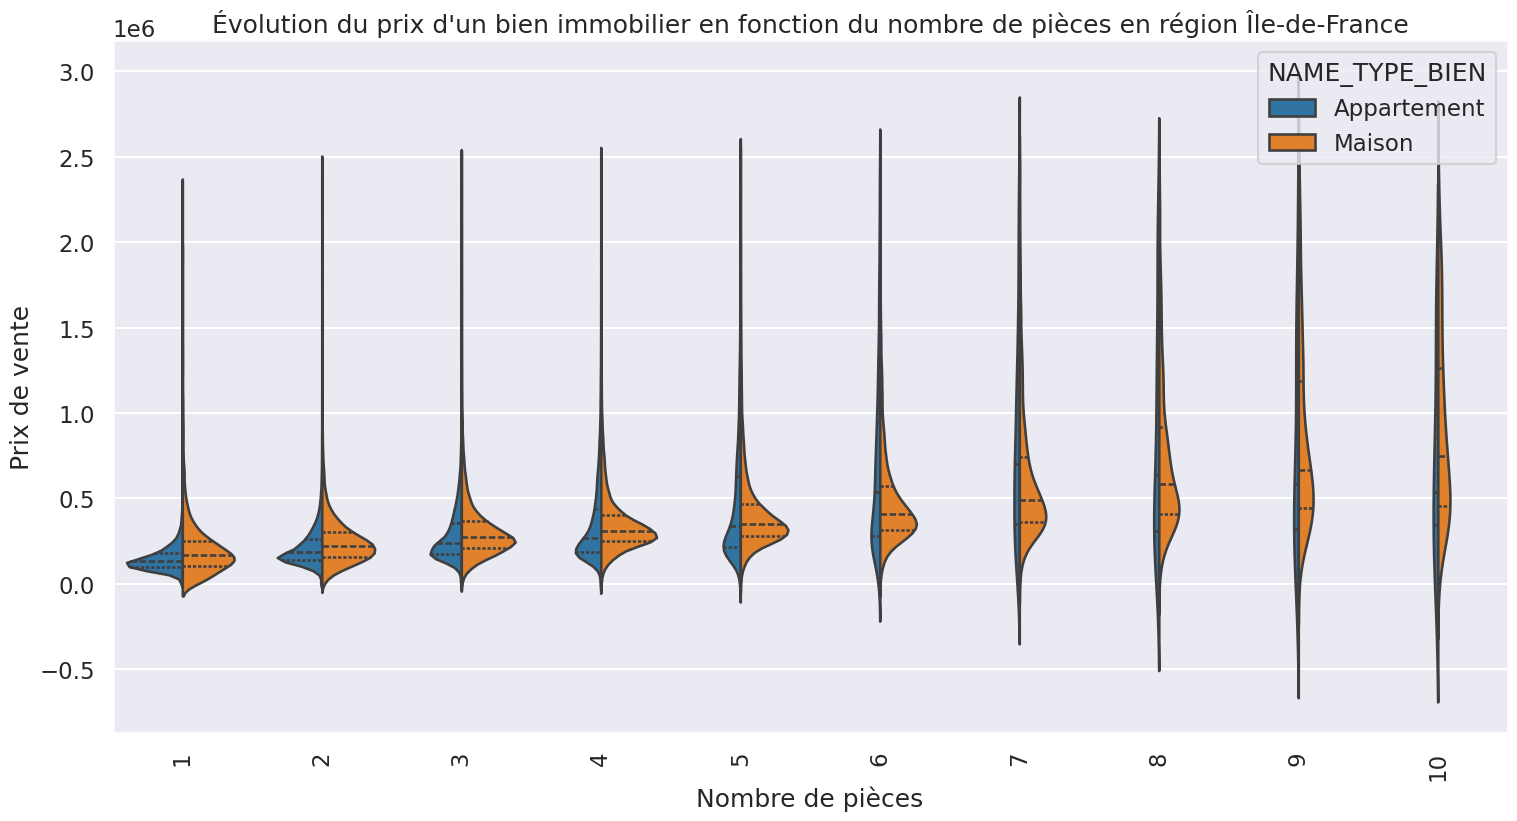

In [90]:
select_region = ["Normandie","Bretagne","Île-de-France"]

for region in select_region:
    df_temp = df.loc[(df.MONTANT<=2500000) & (df.NB_PIECES<=10) & (df.NB_PIECES>0) & (df.Name_region==region),
                     ["MONTANT","NB_PIECES","NAME_TYPE_BIEN"]]

    plt.figure(figsize=(18, 9))
    ax = sns.violinplot(data=df_temp, 
                        x="NB_PIECES", 
                        y="MONTANT", 
                        hue="NAME_TYPE_BIEN", 
                        split=True, 
                        inner="quart")
    plt.title(f"Évolution du prix d'un bien immobilier en fonction du nombre de pièces en région {region}")
    plt.xlabel('Nombre de pièces')
    plt.ylabel('Prix de vente')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

/tmp/ipykernel_12673/2412924734.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


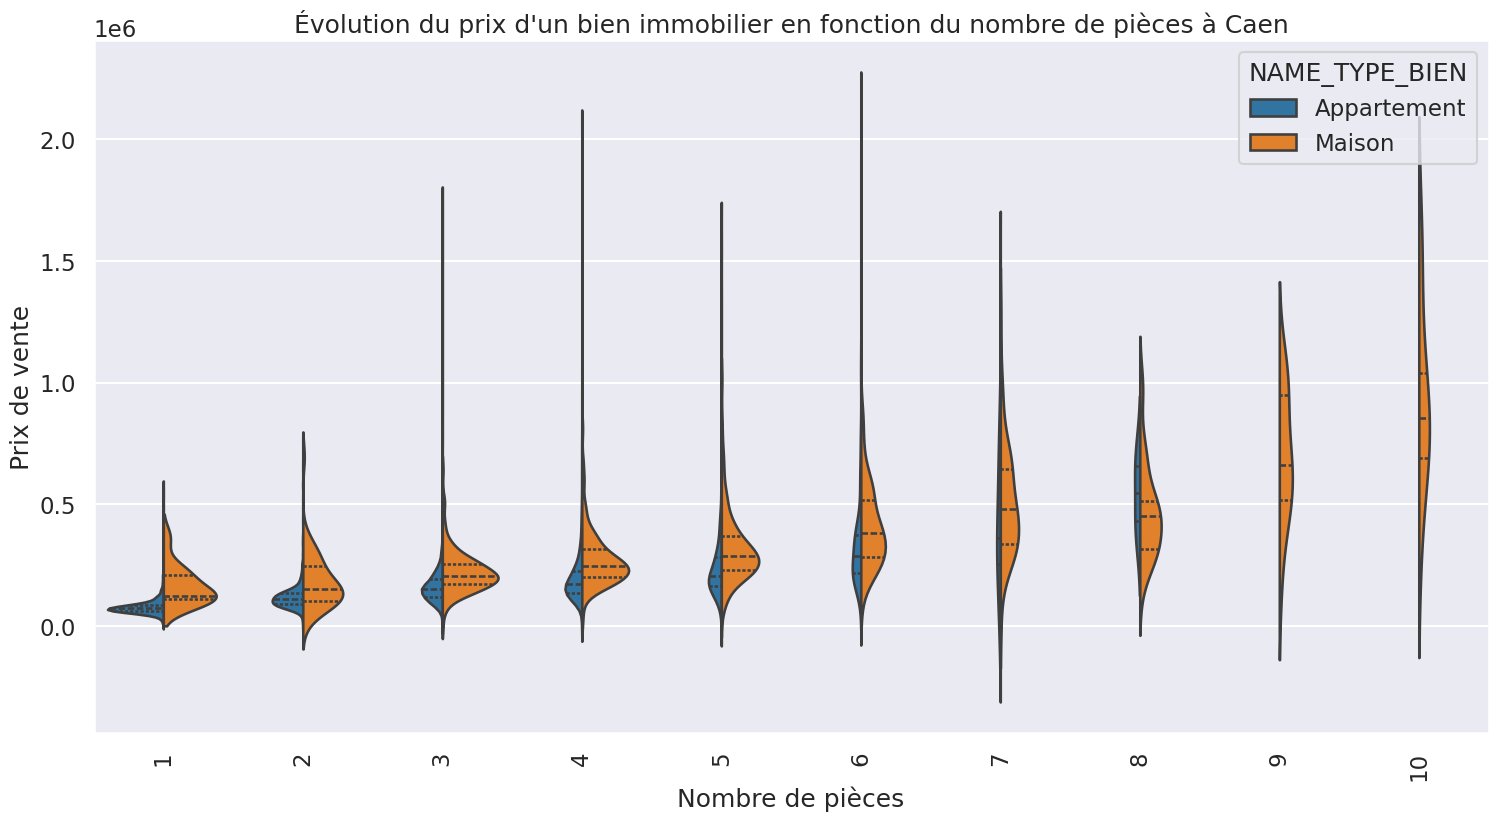

/tmp/ipykernel_12673/2412924734.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


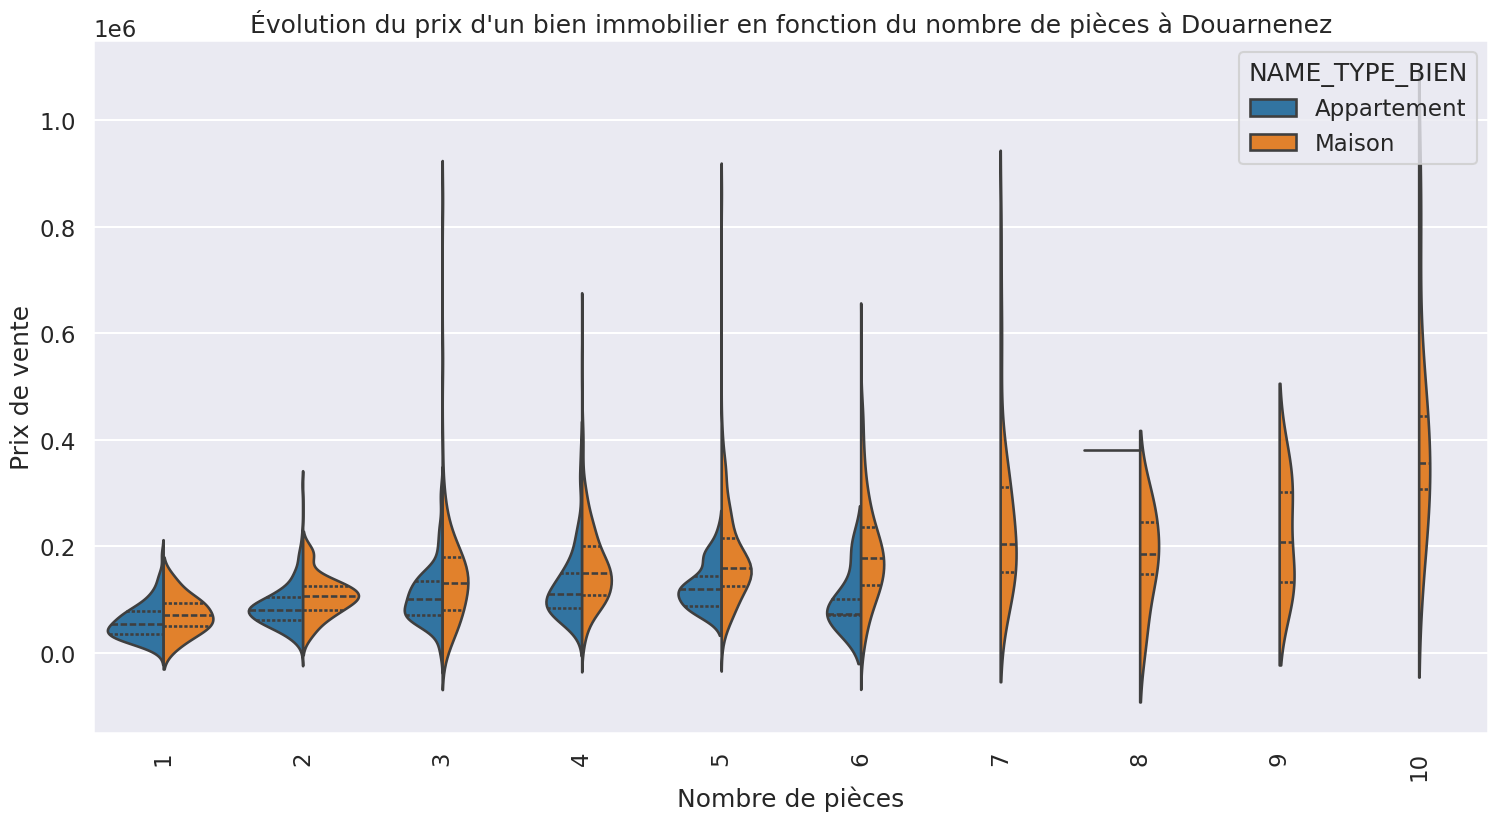

/tmp/ipykernel_12673/2412924734.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


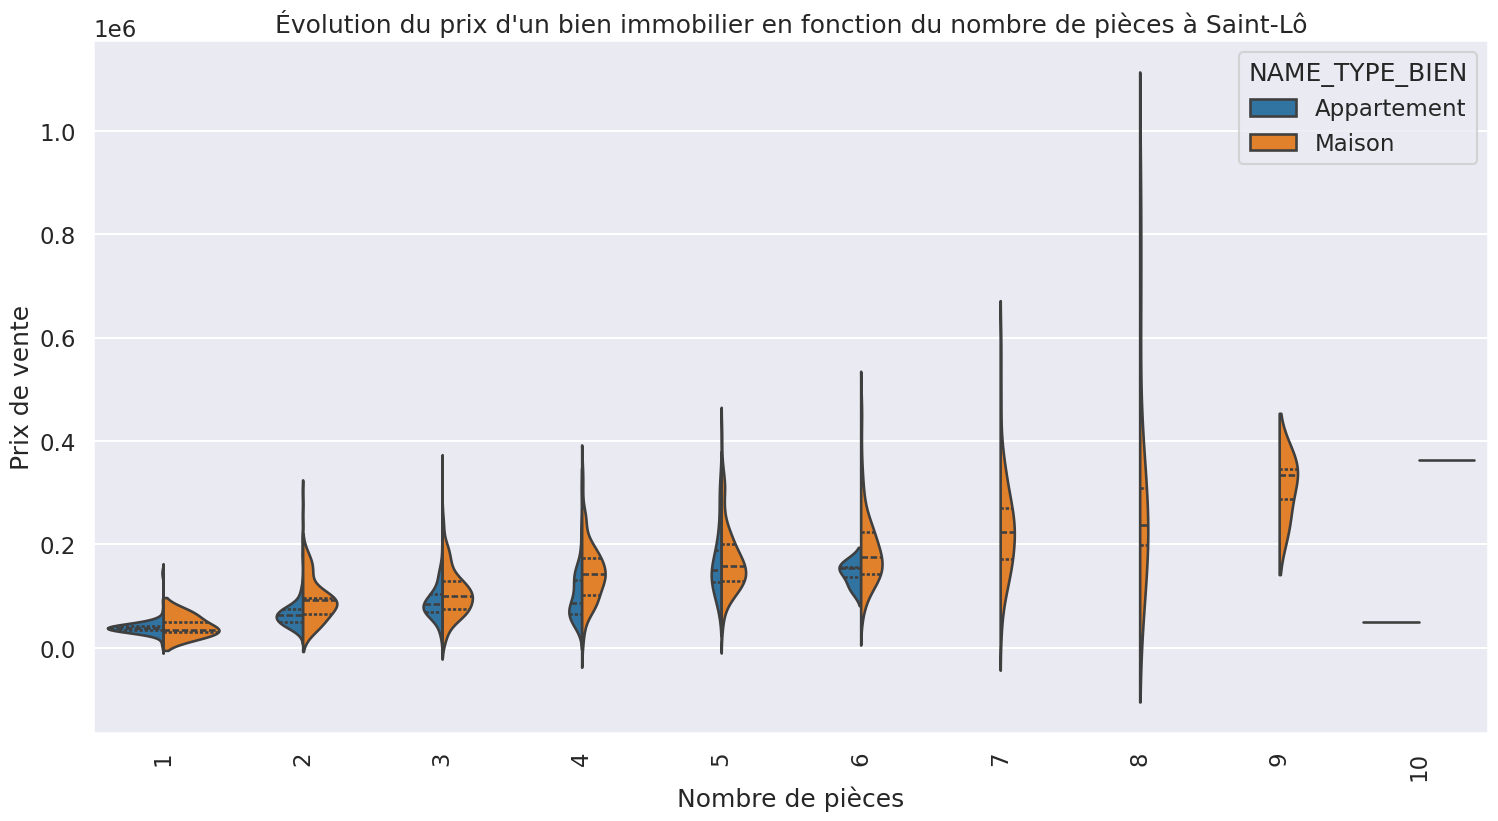

In [91]:
select_ville = ["Caen","Douarnenez","Saint-Lô"]

for ville in select_ville:
    df_temp = df.loc[(df.MONTANT<=2500000) & (df.NB_PIECES<=10) & (df.NB_PIECES>0) & (df.NAME_COMMUNE==ville),
                     ["MONTANT","NB_PIECES","NAME_TYPE_BIEN"]]

    plt.figure(figsize=(18, 9))
    ax = sns.violinplot(data=df_temp, 
                        x="NB_PIECES", 
                        y="MONTANT", 
                        hue="NAME_TYPE_BIEN", 
                        split=True, 
                        inner="quart")
    plt.title(f"Évolution du prix d'un bien immobilier en fonction du nombre de pièces à {ville}")
    plt.xlabel('Nombre de pièces')
    plt.ylabel('Prix de vente')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

### Conclusion : 
- Plus le nombre de pièces augmente plus il est difficile d'estimer le prix d'un bien immobilier le violinplot s'allonge et devient plus étroit 
- On remarque également que suivant la position géographique du bien (petite ou grande agglomération, ville côtière ou non), le violinplot évolue de manière différente. Dans une petite agglomération le prix évolue de manière régulière alors que dans une grande agglomération ou une ville côtière le prix est très variable dès que le bien contiens 3 pièces


<div style="text-align:left; background-color:#d3d696; padding:0px;">
  <h1 style="color:white;">Correlation entre les variables</h1>
</div>
<br>

### Précédemment on a pu voir que les variables pouvant être utiles à l'estimation du prix d'un bien immobilier peuvent-être la surface, la géolocalisation, le nombre de pièces, le type de bien et la période à laquelle le bien a été vendu. La matrice de corrélation va nous permettre de voir les variables ayant le plus d'influence sur le prix de vente et si toutes les variables sont nécessaires pour la création d'un modèle. Si deux variables sont fortement corrélées il sera possible de n'en conserver qu'une seule afin d'améliorer la rapidité d'entraînement et de prédiction du modèle sans trop perturber la performance de celui-ci.

<div style="text-align:left; background-color:#96d6cf; padding:0px;">
  <h1 style="color:black;">A) Sélection des variables</h1>
</div>
<br>

### La surface du terrain étant présente uniquement lors de la vente d'une maison, il y aura donc 2 matrices de correlation, une pour chaque type de biens.

In [11]:
# Chargement des données
df_temp = pd.read_csv("datas_rds.csv", low_memory=False)
df_temp['DATE_MUTATION'] = pd.to_datetime(df_temp['DATE_MUTATION'])
df_temp['Trimestre'] = df_temp['DATE_MUTATION'].dt.to_period('Q')
df_temp.head()

ID_VENTE  MONTANT  NUMERO_RUE                 RUE  CODE_POSTAL  LONGITUDE  \
0    319322   450000         493    RTE DES GARAUDES         1400   4.920458   
1    332279   270600         487      CHE DU SORBIER         1400   4.927372   
2    336158   172000         258   RUE DE MUNETVILLE         1400   4.923902   
3    365184   131500          48  RTE DE LA FONTAINE         1400   4.919941   
4    388374   247000           8      IMP DES CHENES         1400   4.921868   

    LATITUDE DATE_MUTATION  SURFACE_BATI  NB_PIECES  SURFACE_TERRAIN  \
0  46.133160    2018-07-26           233          6            10800   
1  46.137914    2018-07-30           140          5             9074   
2  46.150990    2018-08-08            88          4              600   
3  46.151171    2018-09-20            81          3                0   
4  46.149648    2018-10-23           159          5              977   

   DEPENDANCES  ID_TYPE_BIEN ID_COMMUNE NAME_TYPE_BIEN  \
0            0             2      01001         Maison   
1            0             2      01001         Maison   
2            0             2      01001         Maison   
3            1             1      01001    Appartement   
4            0             2      01001         Maison   

              NAME_COMMUNE Name_departement           Name_region Trimestre  
0  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes    2018Q3  
1  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes    2018Q3  
2  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes    2018Q3  
3  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes    2018Q3  
4  L'Abergement-Clémenciat              Ain  Auvergne-Rhône-Alpes    2018Q4

In [12]:
df_temp_maison= df_temp.loc[(df_temp.MONTANT>15000) & (df_temp.MONTANT<6500000) & (df_temp.NAME_TYPE_BIEN=="Maison"),
                            ["SURFACE_BATI","NB_PIECES","SURFACE_TERRAIN",
                             "DEPENDANCES","ID_COMMUNE",
                             "Name_departement","Name_region","Trimestre","MONTANT"]]

df_temp_appt= df_temp.loc[(df_temp.MONTANT>15000) & (df_temp.MONTANT<6500000) & (df_temp.NAME_TYPE_BIEN=="Appartement"),
                          ["SURFACE_BATI","NB_PIECES","DEPENDANCES","ID_COMMUNE",
                           "Name_departement","Name_region",
                           "Trimestre","MONTANT"]]

<div style="text-align:left; background-color:#96d6cf; padding:0px;">
  <h1 style="color:black;">B) Nettoyage des valeurs incohérentes vu précédemment dans l'EDA</h1>
</div>
<br>

#### Valeurs nulles

In [13]:
print("Maison")
print("Nombre de lignes avec un nombre de pièces égal à 0 :", df_temp_maison.loc[df_temp_maison.NB_PIECES==0,:].shape[0])
print("Nombre de lignes avec une surface égale à 0 :", df_temp_maison.loc[df_temp_maison.SURFACE_BATI==0,:].shape[0])

print("Appartement")
print("Nombre de lignes avec un nombre de pièces égal à 0 :", df_temp_appt.loc[df_temp_appt.NB_PIECES==0,:].shape[0])
print("Nombre de lignes avec une surface égale à 0 :", df_temp_appt.loc[df_temp_appt.SURFACE_BATI==0,:].shape[0])

Maison
Nombre de lignes avec un nombre de pièces égal à 0 : 1760
Nombre de lignes avec une surface égale à 0 : 55
Appartement
Nombre de lignes avec un nombre de pièces égal à 0 : 1208
Nombre de lignes avec une surface égale à 0 : 21


In [14]:
df_temp_maison = df_temp_maison.loc[(df_temp_maison.NB_PIECES>0) & (df_temp_maison.SURFACE_BATI>0),:]
df_temp_appt = df_temp_appt.loc[(df_temp_appt.NB_PIECES>0) & (df_temp_appt.SURFACE_BATI>0),:]

<div style="text-align:left; background-color:#96d6cf; padding:0px;">
  <h1 style="color:black;">C) Transformation des variables catégorielles en variables numériques et standardisation</h1>
</div>
<br>

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Labellisation et standardisation des données concernant les ventes des appartements
non_numerical = df_temp_appt.select_dtypes(exclude=['number']).columns.to_list()

features = df_temp_appt.columns
# Labellisation 
for col in non_numerical:
    le = LabelEncoder()
    df_temp_appt[col] = le.fit_transform(df_temp_appt[col])
# Standardisation
for col in features:
    scaler = StandardScaler()
    df_temp_appt[col] = scaler.fit_transform(df_temp_appt[col].values.reshape(-1, 1))

# Labellisation et standardisation des données concernant les ventes des maisons
non_numerical = df_temp_maison.select_dtypes(exclude=['number']).columns.to_list()

features = df_temp_appt.columns
# Labellisation 
for col in non_numerical:
    le = LabelEncoder()
    df_temp_maison[col] = le.fit_transform(df_temp_maison[col])
# Standardisation
for col in features:
    scaler = StandardScaler()
    df_temp_maison[col] = scaler.fit_transform(df_temp_maison[col].values.reshape(-1, 1))

In [21]:
df_temp_appt.head()

SURFACE_BATI  NB_PIECES  DEPENDANCES  ID_COMMUNE  Name_departement  \
3       0.790476   0.261893     0.703735   -1.836082          -1.84019   
78      0.502817   0.261893     0.703735   -1.835863          -1.84019   
79      0.394944   0.261893    -1.420989   -1.835863          -1.84019   
80     -0.324204  -0.600080     0.703735   -1.835863          -1.84019   
82     -0.468033  -0.600080     0.703735   -1.835863          -1.84019   

    Name_region  Trimestre   MONTANT  
3     -1.613302  -1.710816 -0.306178  
78    -1.613302  -1.710816 -0.198322  
79    -1.613302  -1.710816 -0.221940  
80    -1.613302  -1.710816 -0.419020  
82    -1.613302  -1.710816 -0.487250

<div style="text-align:left; background-color:#96d6cf; padding:0px;">
  <h1 style="color:black;">D) Affichage de la matrice de corrélation</h1>
</div>
<br>

## Sur l'ensemble des données

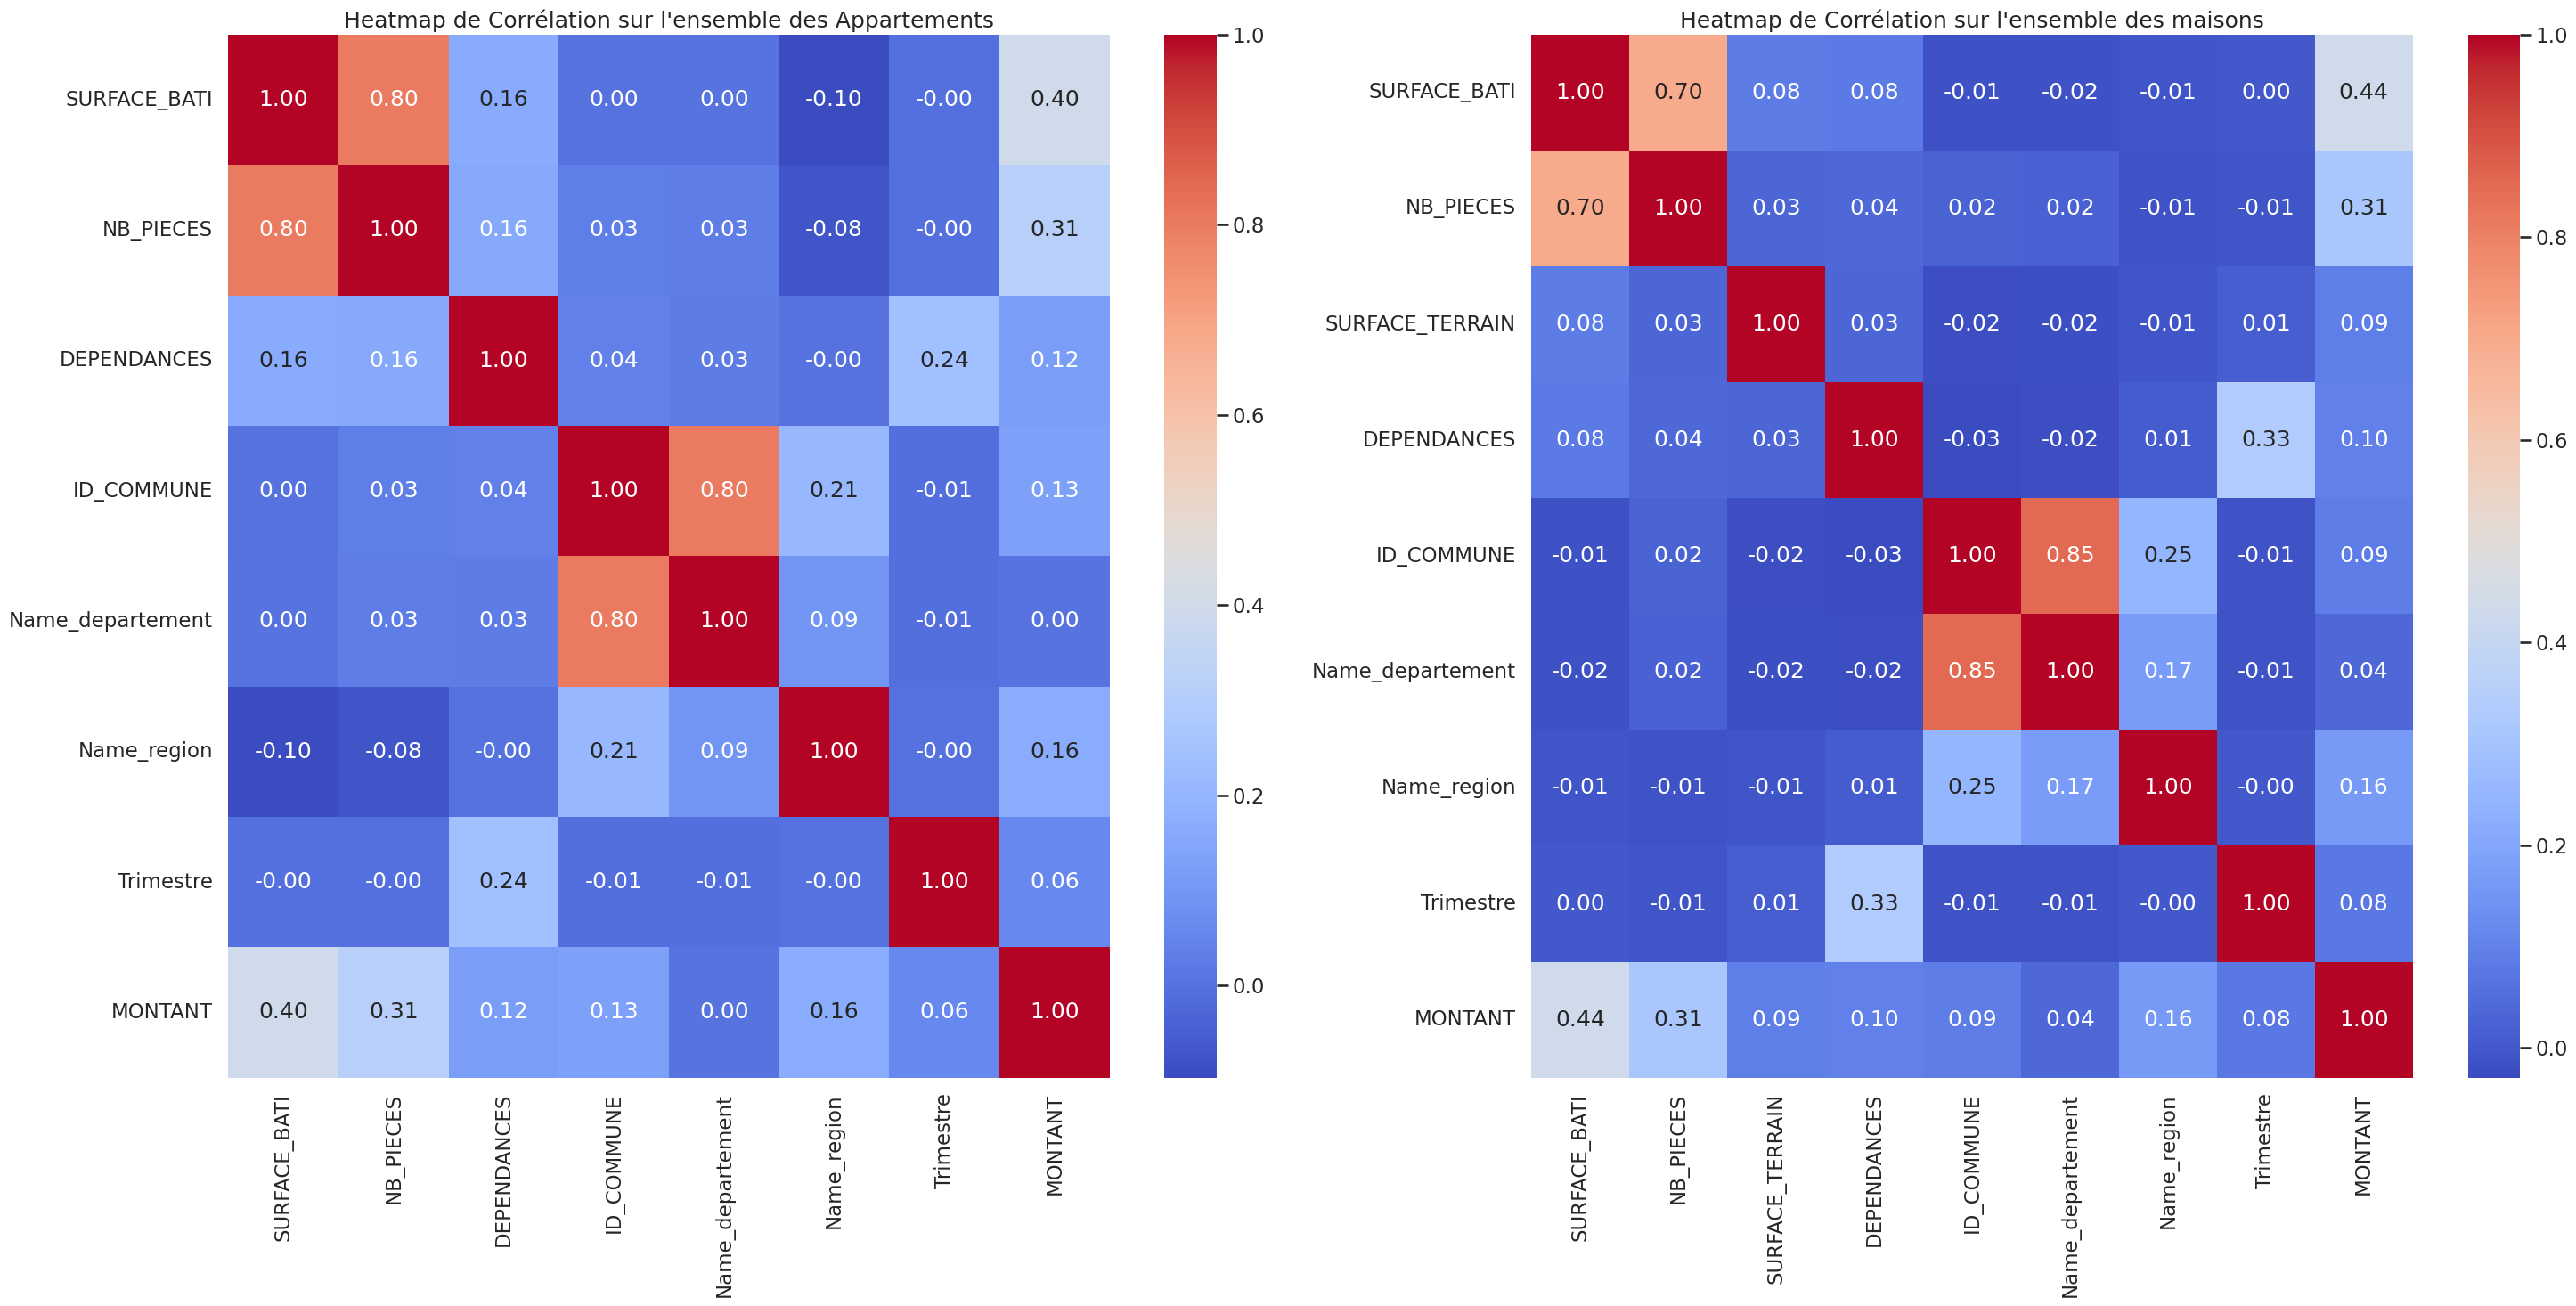

In [24]:
fig, ax = plt.subplots(1,2, figsize=(30, 15))

sns.heatmap(df_temp_appt.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax[0])
ax[0].set_title("Heatmap de Corrélation sur l'ensemble des Appartements")

sns.heatmap(df_temp_maison.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax[1])
ax[1].set_title("Heatmap de Corrélation sur l'ensemble des maisons")

plt.tight_layout()

plt.show()

## Matrice de correlation sur une zone géographique plus restreinte :

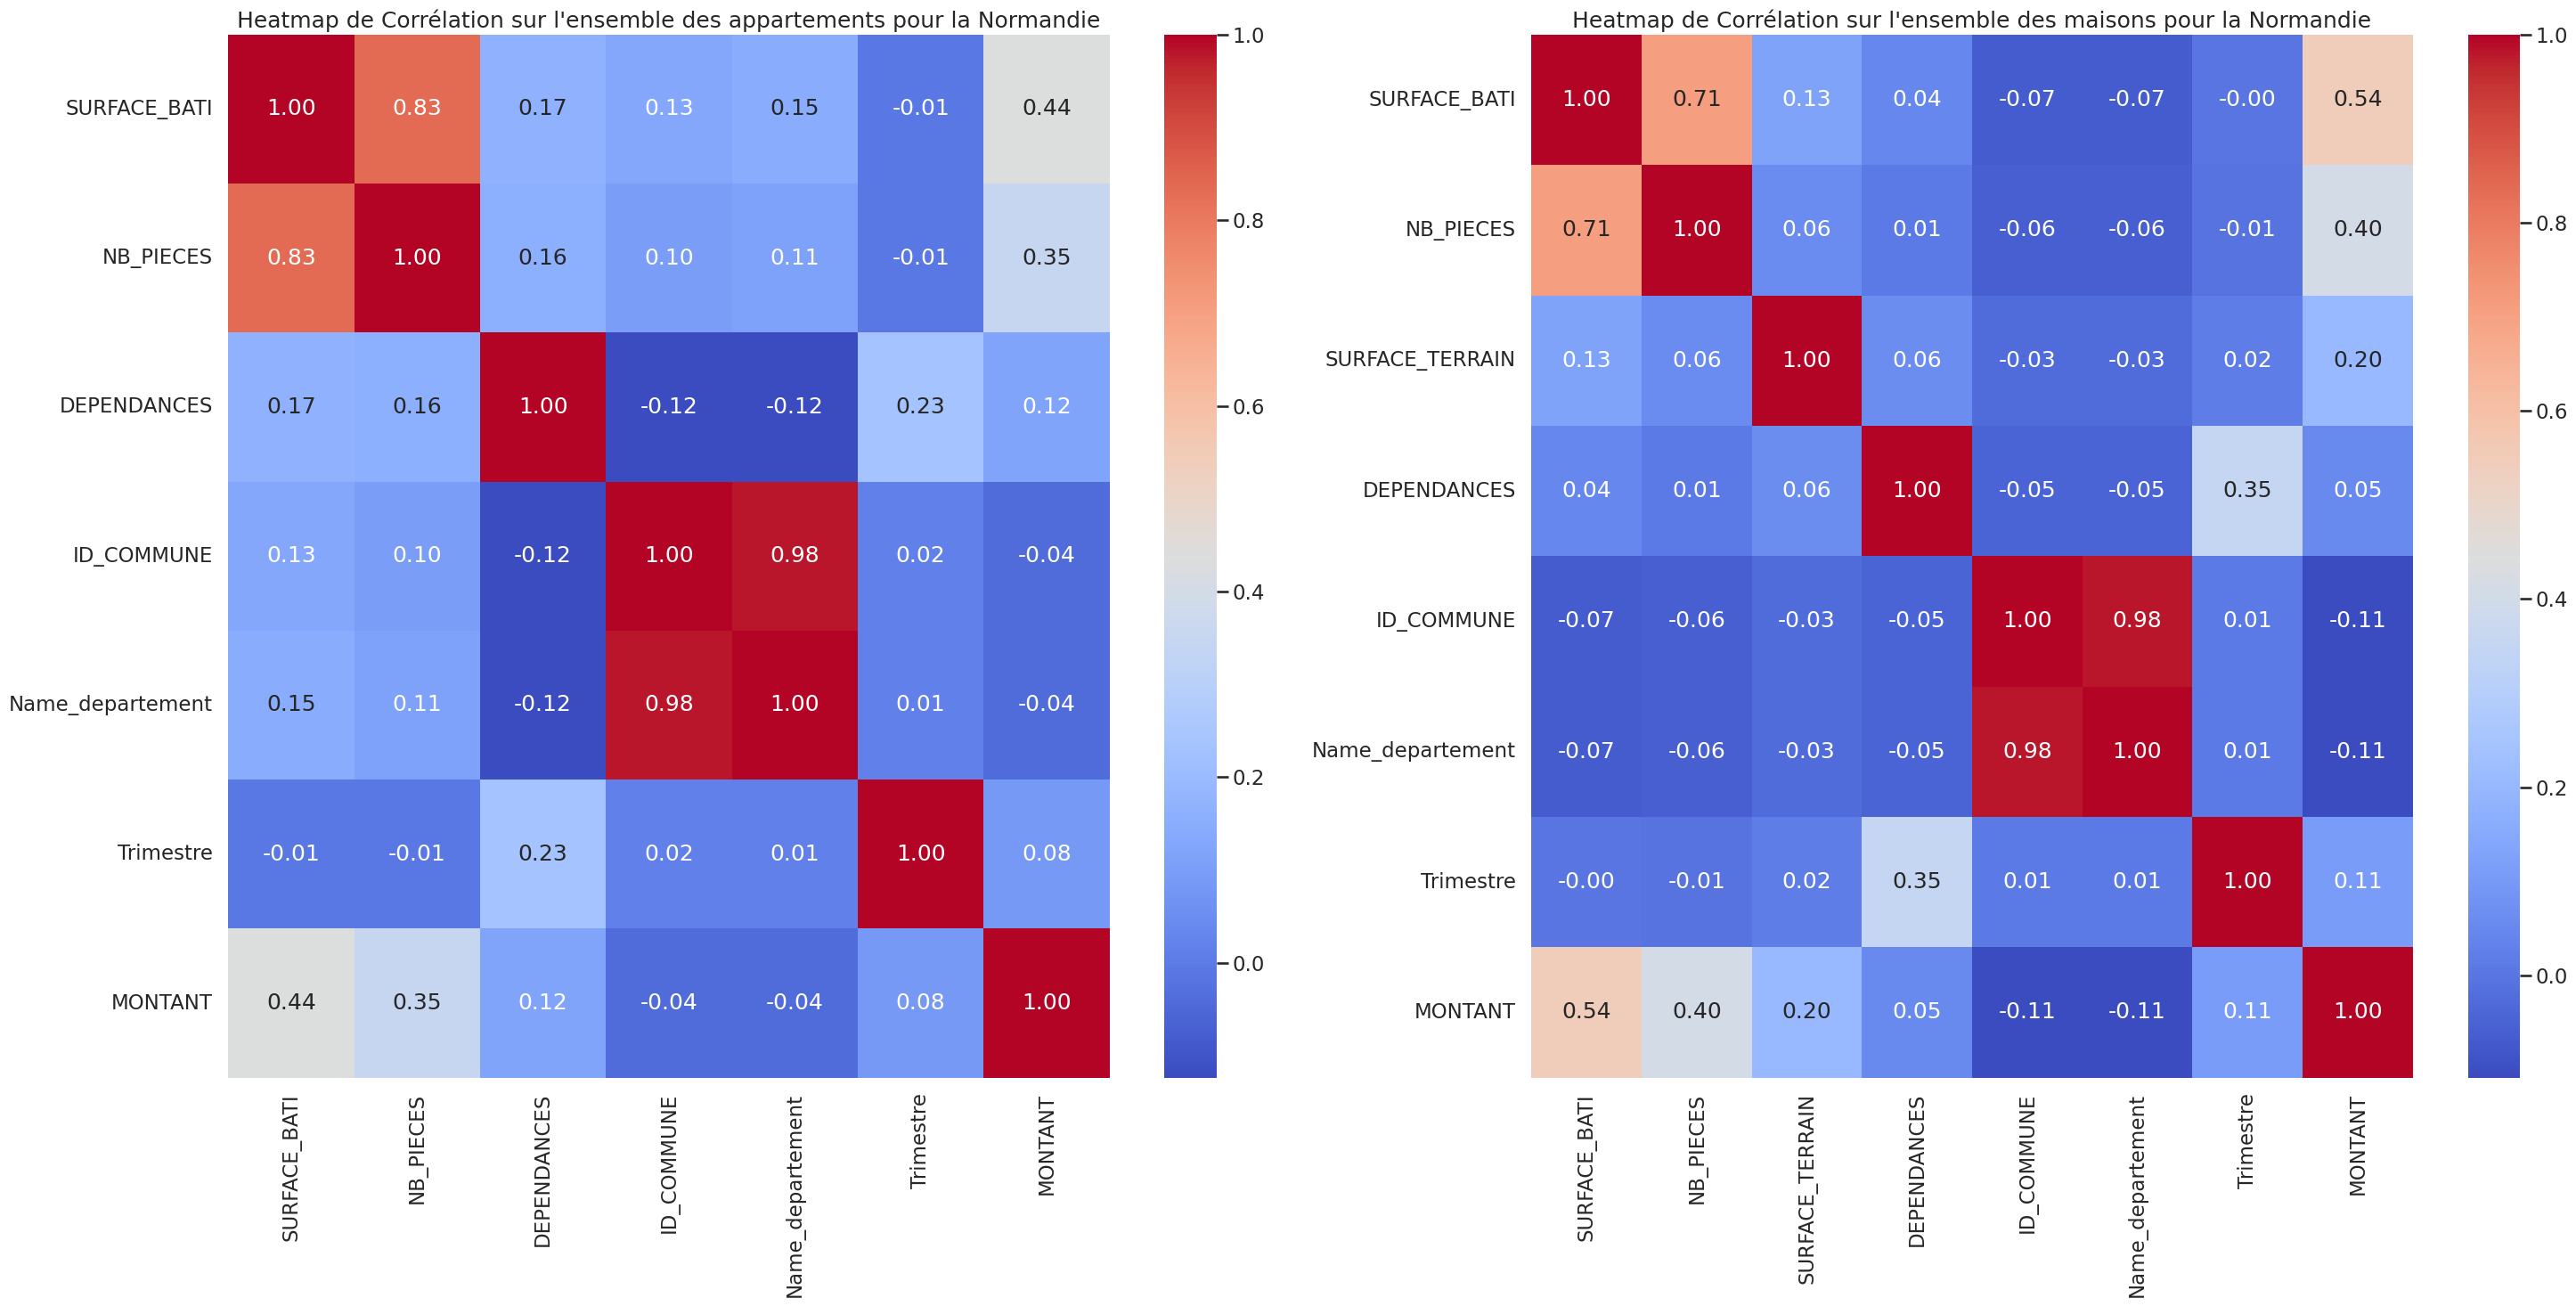

In [25]:
# Chargement des données
df_temp = pd.read_csv("datas_rds.csv", low_memory=False)
df_temp['DATE_MUTATION'] = pd.to_datetime(df_temp['DATE_MUTATION'])
df_temp['Trimestre'] = df_temp['DATE_MUTATION'].dt.to_period('Q')
df_temp.head()

# Nettoyage et selection des données,
df_temp_maison= df_temp.loc[(df_temp.MONTANT>15000) & (df_temp.MONTANT<6500000) & (df_temp.NAME_TYPE_BIEN=="Maison") & (df_temp.Name_region=="Normandie"),
                            ["SURFACE_BATI","NB_PIECES","SURFACE_TERRAIN",
                             "DEPENDANCES","ID_COMMUNE",
                             "Name_departement","Trimestre","MONTANT"]]

df_temp_appt= df_temp.loc[(df_temp.MONTANT>15000) & (df_temp.MONTANT<6500000) & (df_temp.NAME_TYPE_BIEN=="Appartement")& (df_temp.Name_region=="Normandie"),
                          ["SURFACE_BATI","NB_PIECES","DEPENDANCES","ID_COMMUNE",
                           "Name_departement",
                           "Trimestre","MONTANT"]]

# Suppression des lignes ne comportant pas de pièce ou ayant une surface égale à 0
df_temp_maison = df_temp_maison.loc[(df_temp_maison.NB_PIECES>0) & (df_temp_maison.SURFACE_BATI>0),:]
df_temp_appt = df_temp_appt.loc[(df_temp_appt.NB_PIECES>0) & (df_temp_appt.SURFACE_BATI>0),:]

# Labellisation et standardisation des données concernant les ventes des appartements
non_numerical = df_temp_appt.select_dtypes(exclude=['number']).columns.to_list()

features = df_temp_appt.columns
# Labellisation 
for col in non_numerical:
    le = LabelEncoder()
    df_temp_appt[col] = le.fit_transform(df_temp_appt[col])
# Standardisation
for col in features:
    scaler = StandardScaler()
    df_temp_appt[col] = scaler.fit_transform(df_temp_appt[col].values.reshape(-1, 1))

# Labellisation et standardisation des données concernant les ventes des maisons
non_numerical = df_temp_maison.select_dtypes(exclude=['number']).columns.to_list()

features = df_temp_appt.columns
# Labellisation 
for col in non_numerical:
    le = LabelEncoder()
    df_temp_maison[col] = le.fit_transform(df_temp_maison[col])
# Standardisation
for col in features:
    scaler = StandardScaler()
    df_temp_maison[col] = scaler.fit_transform(df_temp_maison[col].values.reshape(-1, 1))


# Tracé des matrices de correlation
fig, ax = plt.subplots(1,2, figsize=(30, 15))

sns.heatmap(df_temp_appt.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax[0])
ax[0].set_title("Heatmap de Corrélation sur l'ensemble des appartements pour la Normandie")

sns.heatmap(df_temp_maison.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax[1])
ax[1].set_title("Heatmap de Corrélation sur l'ensemble des maisons pour la Normandie")

plt.tight_layout()

plt.show()

<div style="text-align:left; background-color:#96d6cf; padding:0px;">
  <h1 style="color:black;">E) Conclusion</h1>
</div>
<br>

### Nous pouvons remarquer que plus la zone géographique de la matrice de confusion est petite plus la corrélation entre les variables et le montant est forte.
### On remarque également une correlation assez forte entre la surface du bien, son type et la surface. Ce qui est logique une maison est en moyenne plus grande qu'un appartement et plus il y a de pièces plus la surface est grande.
### Pour la version V1 il n'y aura qu'un seul modèle pour valider le schéma d'architecture de l'application et le bon fonctionnement des modules les uns avec les autres(aws,heroku,fastapi,streamlit).
### Pour les versions suivantes il y aura un modèle par région